# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nbeha\AppData\Local\Temp\ipykernel_16544\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Functions

In [2]:
def null_and_unique_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    Completes information about the dataframe columns, including unique values and null values.
    """

    df_list = []
    for col in df.columns:
        info_df = pd.DataFrame(
            {col: [
                df[col].nunique(), df[col].isnull().sum()]}, index=['unique_values', 'null_values'])
        df_list.append(info_df)

    return pd.concat(df_list, axis=1)

# Data ingestion

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

random_feature = 'random_feature1'
random_feature2 = 'random_feature2'

# random features that may help to understand the data, due to not being correlated with the target
mu = 20
sigma = 5
train[random_feature] = np.random.rand(train.shape[0])
train[random_feature2] = sigma * np.random.randn(train.shape[0]) + mu
train

,fake_cnpj,date_reference,general_lost_pct_risco,years_since_first_relationship,chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo,days_since_oldest_board_member,v001r_social_capital,cnt_declined_reasons,chk_esp_cred_rot_a_vencer_pct_risco,general_limite_de_cred_sum_pct_risco,...,general_prejuizo_sum_pct_risco,general_lost_pct_cart_cred,general_a_vencer_under180d,general_a_vencer_over180d,general_vencido_max_prev_6mo,general_vencido_pct_risco_max_prev_6mo,general_vencido_pct_carteira_cred__max_prev_6mo,TARGET_default_within_11m,random_feature1,random_feature2
0,76,2021-04-01,0.000000,24.473973,0.025317,-1.000000,0.00,0,2.531734e-02,0.955332,...,0.0,0.000000,1913.06,0.00,0.00,0.000000,0.000000,0,0.260430,22.455702
1,76,2021-05-01,0.000000,24.556164,0.064502,-1.000000,0.00,0,6.450210e-02,0.855601,...,0.0,0.000000,6594.61,0.00,0.00,0.000000,0.000000,0,0.226898,25.583726
2,76,2021-03-01,0.000000,24.389041,0.002089,-1.000000,0.00,0,6.725405e-04,0.942499,...,0.0,0.000000,2562.37,0.00,0.00,0.000000,0.000000,0,0.004728,23.680019
3,254,2020-10-01,0.000000,9.778082,0.031099,-1.000000,0.00,1,4.763198e-03,0.036832,...,0.0,0.000000,149706.77,44631.52,105719.03,0.330432,0.434642,1,0.157813,17.695129
4,254,2020-12-01,0.067327,9.945205,0.019554,-1.000000,0.00,1,1.955423e-02,0.038821,...,0.0,0.096859,122362.22,39510.03,105719.03,0.330432,0.434642,1,0.224976,24.776870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26213,18718,2021-04-01,0.000000,6.871233,0.002957,6.904110,5084484.98,0,2.826483e-03,0.656883,...,0.0,0.000000,502780.84,105048.50,0.00,0.000000,0.000000,0,0.866729,23.827724
26214,18718,2021-03-01,0.000000,6.786301,0.002957,6.819178,5084484.98,0,7.855551e-05,0.373114,...,0.0,0.000000,1004436.25,112866.58,0.00,0.000000,0.000000,0,0.383084,18.945919
26215,18718,2021-01-01,0.000000,6.624658,0.002957,6.657534,5084484.98,0,4.661295e-07,0.379245,...,0.0,0.000000,865327.44,146781.27,0.00,0.000000,0.000000,0,0.239342,25.548566
26216,18718,2021-02-01,0.000000,6.709589,0.002957,6.742466,5084484.98,0,2.724807e-03,0.535538,...,0.0,0.000000,613041.32,140339.17,0.00,0.000000,0.000000,0,0.164706,14.877146


## Fast check on data type and values

In [4]:
train.dtypes

fake_cnpj                                             int64
date_reference                                       object
general_lost_pct_risco                              float64
years_since_first_relationship                      float64
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo    float64
days_since_oldest_board_member                      float64
v001r_social_capital                                float64
cnt_declined_reasons                                  int64
chk_esp_cred_rot_a_vencer_pct_risco                 float64
general_limite_de_cred_sum_pct_risco                float64
general_limite_de_cred_sum                          float64
general_a_vencer_weighted_periodo_div_pct_risco     float64
avg_final_numeric_prediction_prev_6mo               float64
is_not_able_to_calc_interest                          int64
min_lt_ir3_prev_6mo                                 float64
general_limite_de_cred_360m_sum                     float64
v204r_is_popular_domain                 

In [5]:
# Summary of column values
summary = pd.concat([train.describe(), null_and_unique_info(train)], axis=0)
summary

,fake_cnpj,general_lost_pct_risco,years_since_first_relationship,chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo,days_since_oldest_board_member,v001r_social_capital,cnt_declined_reasons,chk_esp_cred_rot_a_vencer_pct_risco,general_limite_de_cred_sum_pct_risco,general_limite_de_cred_sum,...,general_lost_pct_cart_cred,general_a_vencer_under180d,general_a_vencer_over180d,general_vencido_max_prev_6mo,general_vencido_pct_risco_max_prev_6mo,general_vencido_pct_carteira_cred__max_prev_6mo,TARGET_default_within_11m,random_feature1,random_feature2,date_reference
count,26218.000000,26218.000000,26218.000000,26218.000000,26218.000000,2.621800e+04,26218.000000,26218.000000,26218.000000,2.621800e+04,...,26218.000000,2.621800e+04,2.621800e+04,2.621800e+04,26218.000000,26218.000000,26218.000000,26218.000000,26218.000000,NaN
mean,26251.975513,0.002806,6.867008,0.087749,5.772278,1.158848e+07,0.137882,0.032268,0.259082,2.261826e+05,...,0.003135,2.517424e+06,1.795506e+06,1.647838e+04,0.030005,0.036960,0.130674,0.501077,20.029364,NaN
std,22798.033642,0.012214,7.711577,0.188821,7.362316,4.425315e+08,0.359938,0.113482,0.285052,2.018313e+06,...,0.015696,6.369608e+07,2.784298e+07,2.163434e+05,0.120349,0.139082,0.337049,0.288388,4.995362,NaN
min,27.000000,0.000000,-0.079452,0.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000032,-1.091816,NaN
25%,10282.000000,0.000000,1.731507,0.000000,0.893151,1.500000e+04,0.000000,0.000000,0.030485,2.889493e+03,...,0.000000,1.141761e+04,5.255000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.252714,16.664837,NaN
50%,21991.000000,0.000000,4.087671,0.003674,3.465753,7.880000e+04,0.000000,0.000000,0.148577,1.923646e+04,...,0.000000,4.032856e+04,3.658864e+04,0.000000e+00,0.000000,0.000000,0.000000,0.499743,20.030107,NaN
75%,35133.500000,0.000000,9.345205,0.074646,8.304110,1.100000e+05,0.000000,0.005352,0.398579,8.082045e+04,...,0.000000,1.590713e+05,1.705324e+05,0.000000e+00,0.000000,0.000000,0.000000,0.750528,23.388062,NaN
max,116351.000000,0.099911,57.136986,1.000000,58.230137,2.363107e+10,2.000000,1.000000,0.999493,9.933836e+07,...,0.923074,5.791247e+09,1.980024e+09,1.083299e+07,1.000000,1.000000,1.000000,0.999943,42.689258,NaN
unique_values,5258.000000,2514.000000,7048.000000,7104.000000,6928.000000,6.180000e+02,3.000000,11126.000000,22941.000000,1.961600e+04,...,2514.000000,2.601800e+04,1.885600e+04,2.492000e+03,2493.000000,2470.000000,2.000000,26218.000000,26218.000000,9.0
null_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# EDA

In [6]:
keys = ['fake_cnpj', 'date_reference']
target = 'TARGET_default_within_11m'

In [7]:
# unique dtypes
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
# object columns
train.select_dtypes(include='object').columns

Index(['date_reference'], dtype='object')

In [9]:
decimal_features = list(set(train.select_dtypes(include='float')) - set(keys + [target]))
decimal_features

['general_a_vencer_weighted_periodo_div_pct_risco',
 'general_vencido_sum',
 'v001r_social_capital',
 'general_a_vencer_under180d',
 'general_vencido_max_prev_6mo',
 'avg_final_numeric_prediction_prev_6mo',
 'years_since_first_relationship',
 'general_limite_de_cred_sum',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'general_lost_sum',
 'general_limite_de_cred_sum_pct_risco',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_prejuizo_sum',
 'primary_median_ir3_prev_6mo',
 'general_limite_de_cred_360m_sum',
 'general_a_vencer_over180d',
 'carteira_cred_sum',
 'chk_esp_cred_rot_a_vencer_sum',
 'general_cred_de_liberar_sum',
 'general_coobrigacoes_sum',
 'general_a_vencer_under30d',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'general_limite_trend_6mo',
 'general_vencido_sum_sum_pct_risco',
 'random_feature1',
 'special_inter_rate',
 'general_lost_pct_risco',
 'days_since_oldest_board_member',
 'general_prejuizo_sum_pct_risco',
 'credit_a_vencer_sum',
 'risco_total',
 'm

In [10]:
# Integer and boolean features
integer_features = list(set(train.select_dtypes(include='int')) - set(keys + [target]))
integer_features

['v254r_cnt_board_memebers',
 'is_not_able_to_calc_interest',
 'cnt_declined_reasons',
 'v204r_is_popular_domain']

## Target

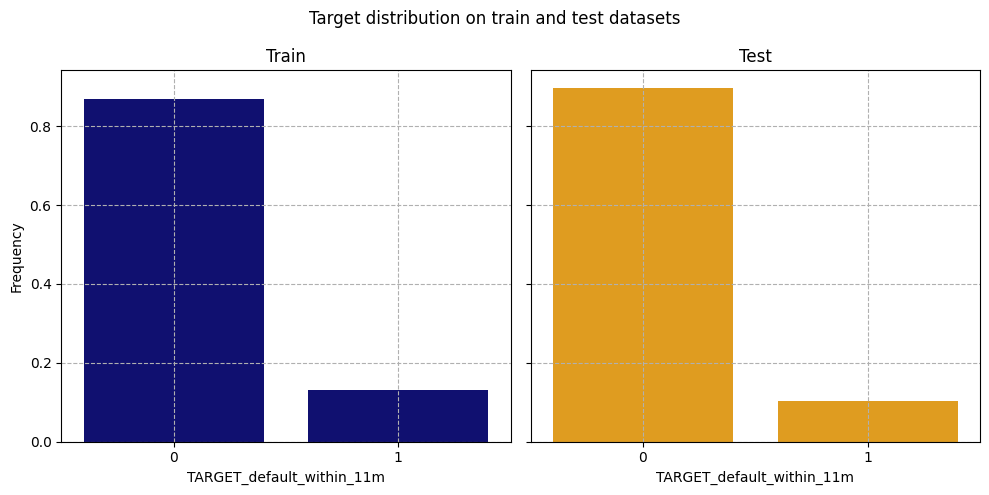

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True, tight_layout=True)
sns.barplot(train[target].value_counts(1), ax=ax[0], label='train', color='navy', legend=False)
sns.barplot(test[target].value_counts(1), ax=ax[1], label='test', color='orange', legend=False)
fig.suptitle('Target distribution on train and test datasets')
ax[0].set_title('Train')
ax[1].set_title('Test')
ax[0].set_ylabel('Frequency')
ax[0].grid(linestyle='--')
ax[1].grid(linestyle='--')
plt.show()

## Features that are based on credit models

In [13]:
# check if feature has 'limit' in its name
crf = list(set([col for col in train.columns if 'lim' in col] + [col for col in train.columns if 'ris' in col]))

set([c for c in train.columns if c not in crf])

{'TARGET_default_within_11m',
 'avg_final_numeric_prediction_prev_6mo',
 'carteira_cred_sum',
 'chk_esp_cred_rot_a_vencer_sum',
 'cnt_declined_reasons',
 'credit_a_vencer_sum',
 'date_reference',
 'days_since_oldest_board_member',
 'days_since_stopped_simples',
 'fake_cnpj',
 'general_a_vencer_over180d',
 'general_a_vencer_sum',
 'general_a_vencer_under180d',
 'general_a_vencer_under30d',
 'general_coobrigacoes_sum',
 'general_cred_de_liberar_sum',
 'general_lost_pct_cart_cred',
 'general_lost_sum',
 'general_prejuizo_sum',
 'general_vencido_max_prev_6mo',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_vencido_sum',
 'is_not_able_to_calc_interest',
 'min_lt_ir3_prev_6mo',
 'primary_median_ir3_prev_6mo',
 'random_feature1',
 'random_feature2',
 'special_inter_rate',
 'v001r_social_capital',
 'v204r_is_popular_domain',
 'v254r_cnt_board_memebers',
 'years_since_first_relationship'}

In [14]:
train[keys + ['chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo', 'chk_esp_cred_rot_a_vencer_pct_risco', 'risco_total']]

,fake_cnpj,date_reference,chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo,chk_esp_cred_rot_a_vencer_pct_risco,risco_total
0,76,2021-04-01,0.025317,2.531734e-02,42828.75
1,76,2021-05-01,0.064502,6.450210e-02,45669.21
2,76,2021-03-01,0.002089,6.725405e-04,44562.37
3,254,2020-10-01,0.031099,4.763198e-03,271517.17
4,254,2020-12-01,0.019554,1.955423e-02,257847.52
...,...,...,...,...,...
26213,18718,2021-04-01,0.002957,2.826483e-03,1771494.81
26214,18718,2021-03-01,0.002957,7.855551e-05,1782306.53
26215,18718,2021-01-01,0.002957,4.661295e-07,1630448.28
26216,18718,2021-02-01,0.002957,2.724807e-03,1622048.79


## Correlations

## Feature correlation with Target

In [15]:
# linear correlation (Pearson) between features and target
correlation_feature_target_dict = {}
for feature in decimal_features + integer_features:
    correlation_feature_target_dict[feature] = train[[target, feature]].corr('pearson')[target][feature]

correlation_feature_target_df = pd.DataFrame(correlation_feature_target_dict, index=['correlation']).T
correlation_feature_target_df['abs_correlation'] = correlation_feature_target_df['correlation'].abs()
correlation_feature_target_df.sort_values(by='abs_correlation', ascending=False)

,correlation,abs_correlation
general_lost_pct_risco,0.306045,0.306045
general_vencido_sum_sum_pct_risco,0.305277,0.305277
cnt_declined_reasons,0.258638,0.258638
general_lost_pct_cart_cred,0.242910,0.242910
general_limite_de_cred_sum_pct_risco,-0.187536,0.187536
general_a_vencer_pct_risco,0.184734,0.184734
general_vencido_pct_risco_max_prev_6mo,0.183865,0.183865
general_vencido_pct_carteira_cred__max_prev_6mo,0.159692,0.159692
days_since_oldest_board_member,-0.151159,0.151159
years_since_first_relationship,-0.147830,0.147830


In [16]:
# Apparently, the linear correlation between the features and the target is very low.
# This may be a problem for linear models.
# The use of non-linear models to solve this problem is an alternative.

In [17]:
# Repeating the process but looking for non-linear correlation using the Spearman correlation, as we don't know
# yet the distributions of the features. 
# The Spearman correlation is a non-parametric measure of rank correlation. It assesses how well the relationship
# between two variables can be described using a monotonic function.

nl_correlation_feature_target_dict = {}
for feature in decimal_features + integer_features:
    nl_correlation_feature_target_dict[feature] = train[[target, feature]].corr('spearman')[target][feature]

nl_correlation_feature_target_df = pd.DataFrame(nl_correlation_feature_target_dict, index=['correlation']).T
nl_correlation_feature_target_df['abs_correlation'] = nl_correlation_feature_target_df['correlation'].abs()
nl_correlation_feature_target_df.sort_values(by='abs_correlation', ascending=False)

,correlation,abs_correlation
general_lost_pct_risco,0.283806,0.283806
general_vencido_sum_sum_pct_risco,0.283465,0.283465
general_lost_pct_cart_cred,0.282934,0.282934
general_lost_sum,0.278322,0.278322
general_vencido_sum,0.278250,0.278250
general_limite_de_cred_sum,-0.266840,0.266840
cnt_declined_reasons,0.256661,0.256661
general_limite_de_cred_360m_sum,-0.252455,0.252455
general_vencido_pct_risco_max_prev_6mo,0.230537,0.230537
general_limite_de_cred_sum_pct_risco,-0.227974,0.227974


### Filtering out the features with almost no correlation with the target feature

In [18]:
# assuming correlation >= 0.5 as a strong correlation, correlation >= 0.3 as a moderate correlation and
# correlation >= 0.1 as a weak correlation, we can select the features that have at least a weak correlation,
# as we may extract some information from them using a boosting model, for example.

features = list(
    nl_correlation_feature_target_df
    .query('abs_correlation >= 0.1')
    .sort_values(by='abs_correlation', ascending=False)
    .index
    )
features

['general_lost_pct_risco',
 'general_vencido_sum_sum_pct_risco',
 'general_lost_pct_cart_cred',
 'general_lost_sum',
 'general_vencido_sum',
 'general_limite_de_cred_sum',
 'cnt_declined_reasons',
 'general_limite_de_cred_360m_sum',
 'general_vencido_pct_risco_max_prev_6mo',
 'general_limite_de_cred_sum_pct_risco',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_vencido_max_prev_6mo',
 'general_a_vencer_pct_risco',
 'days_since_oldest_board_member',
 'v254r_cnt_board_memebers',
 'years_since_first_relationship',
 'general_limite_trend_6mo',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'v204r_is_popular_domain',
 'chk_esp_cred_rot_a_vencer_sum',
 'risco_total']

### Analyzing the correlation between the features to avoid multicollinearity

In [19]:
# check to identify columns with many zeros
train[features].apply(lambda x: (x == 0).mean()).sort_values(ascending=False)

general_vencido_sum                                 0.907964
general_vencido_sum_sum_pct_risco                   0.907964
general_lost_pct_risco                              0.903921
general_lost_pct_cart_cred                          0.903921
general_lost_sum                                    0.903921
cnt_declined_reasons                                0.867457
general_vencido_pct_risco_max_prev_6mo              0.750553
general_vencido_pct_carteira_cred__max_prev_6mo     0.750553
general_vencido_max_prev_6mo                        0.750553
v204r_is_popular_domain                             0.602983
chk_esp_cred_rot_a_vencer_pct_risco                 0.572622
chk_esp_cred_rot_a_vencer_sum                       0.572622
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo    0.326112
general_limite_trend_6mo                            0.199825
general_limite_de_cred_360m_sum                     0.196811
general_limite_de_cred_sum_pct_risco                0.123541
general_limite_de_cred_s

In [20]:
# checking if high correlation means lack of information
(train[['general_vencido_sum_sum_pct_risco', 'general_vencido_sum', 'general_lost_pct_cart_cred', 'general_lost_sum', 'general_lost_pct_risco']]
    .query('general_vencido_sum_sum_pct_risco == 0 and general_vencido_sum == 0 and general_lost_pct_cart_cred == 0 and general_lost_sum == 0 and general_lost_pct_risco == 0')).shape[0], train.shape[0]

(23699, 26218)

In [21]:
# checking if high correlation means lack of information
general_features = [c for c in train.columns if 'general' in c]
general_features_equals_zero_query__and = 'general_vencido_sum_sum_pct_risco == 0 and general_vencido_sum == 0 and general_lost_pct_cart_cred == 0 and general_lost_sum == 0 and general_lost_pct_risco == 0'
general_features_diff_zero_query__or = 'general_vencido_sum_sum_pct_risco != 0 or general_vencido_sum != 0 or general_lost_pct_cart_cred != 0 or general_lost_sum != 0 or general_lost_pct_risco != 0'
train[general_features].query(general_features_equals_zero_query__and).shape[0], train.shape[0]

(23699, 26218)

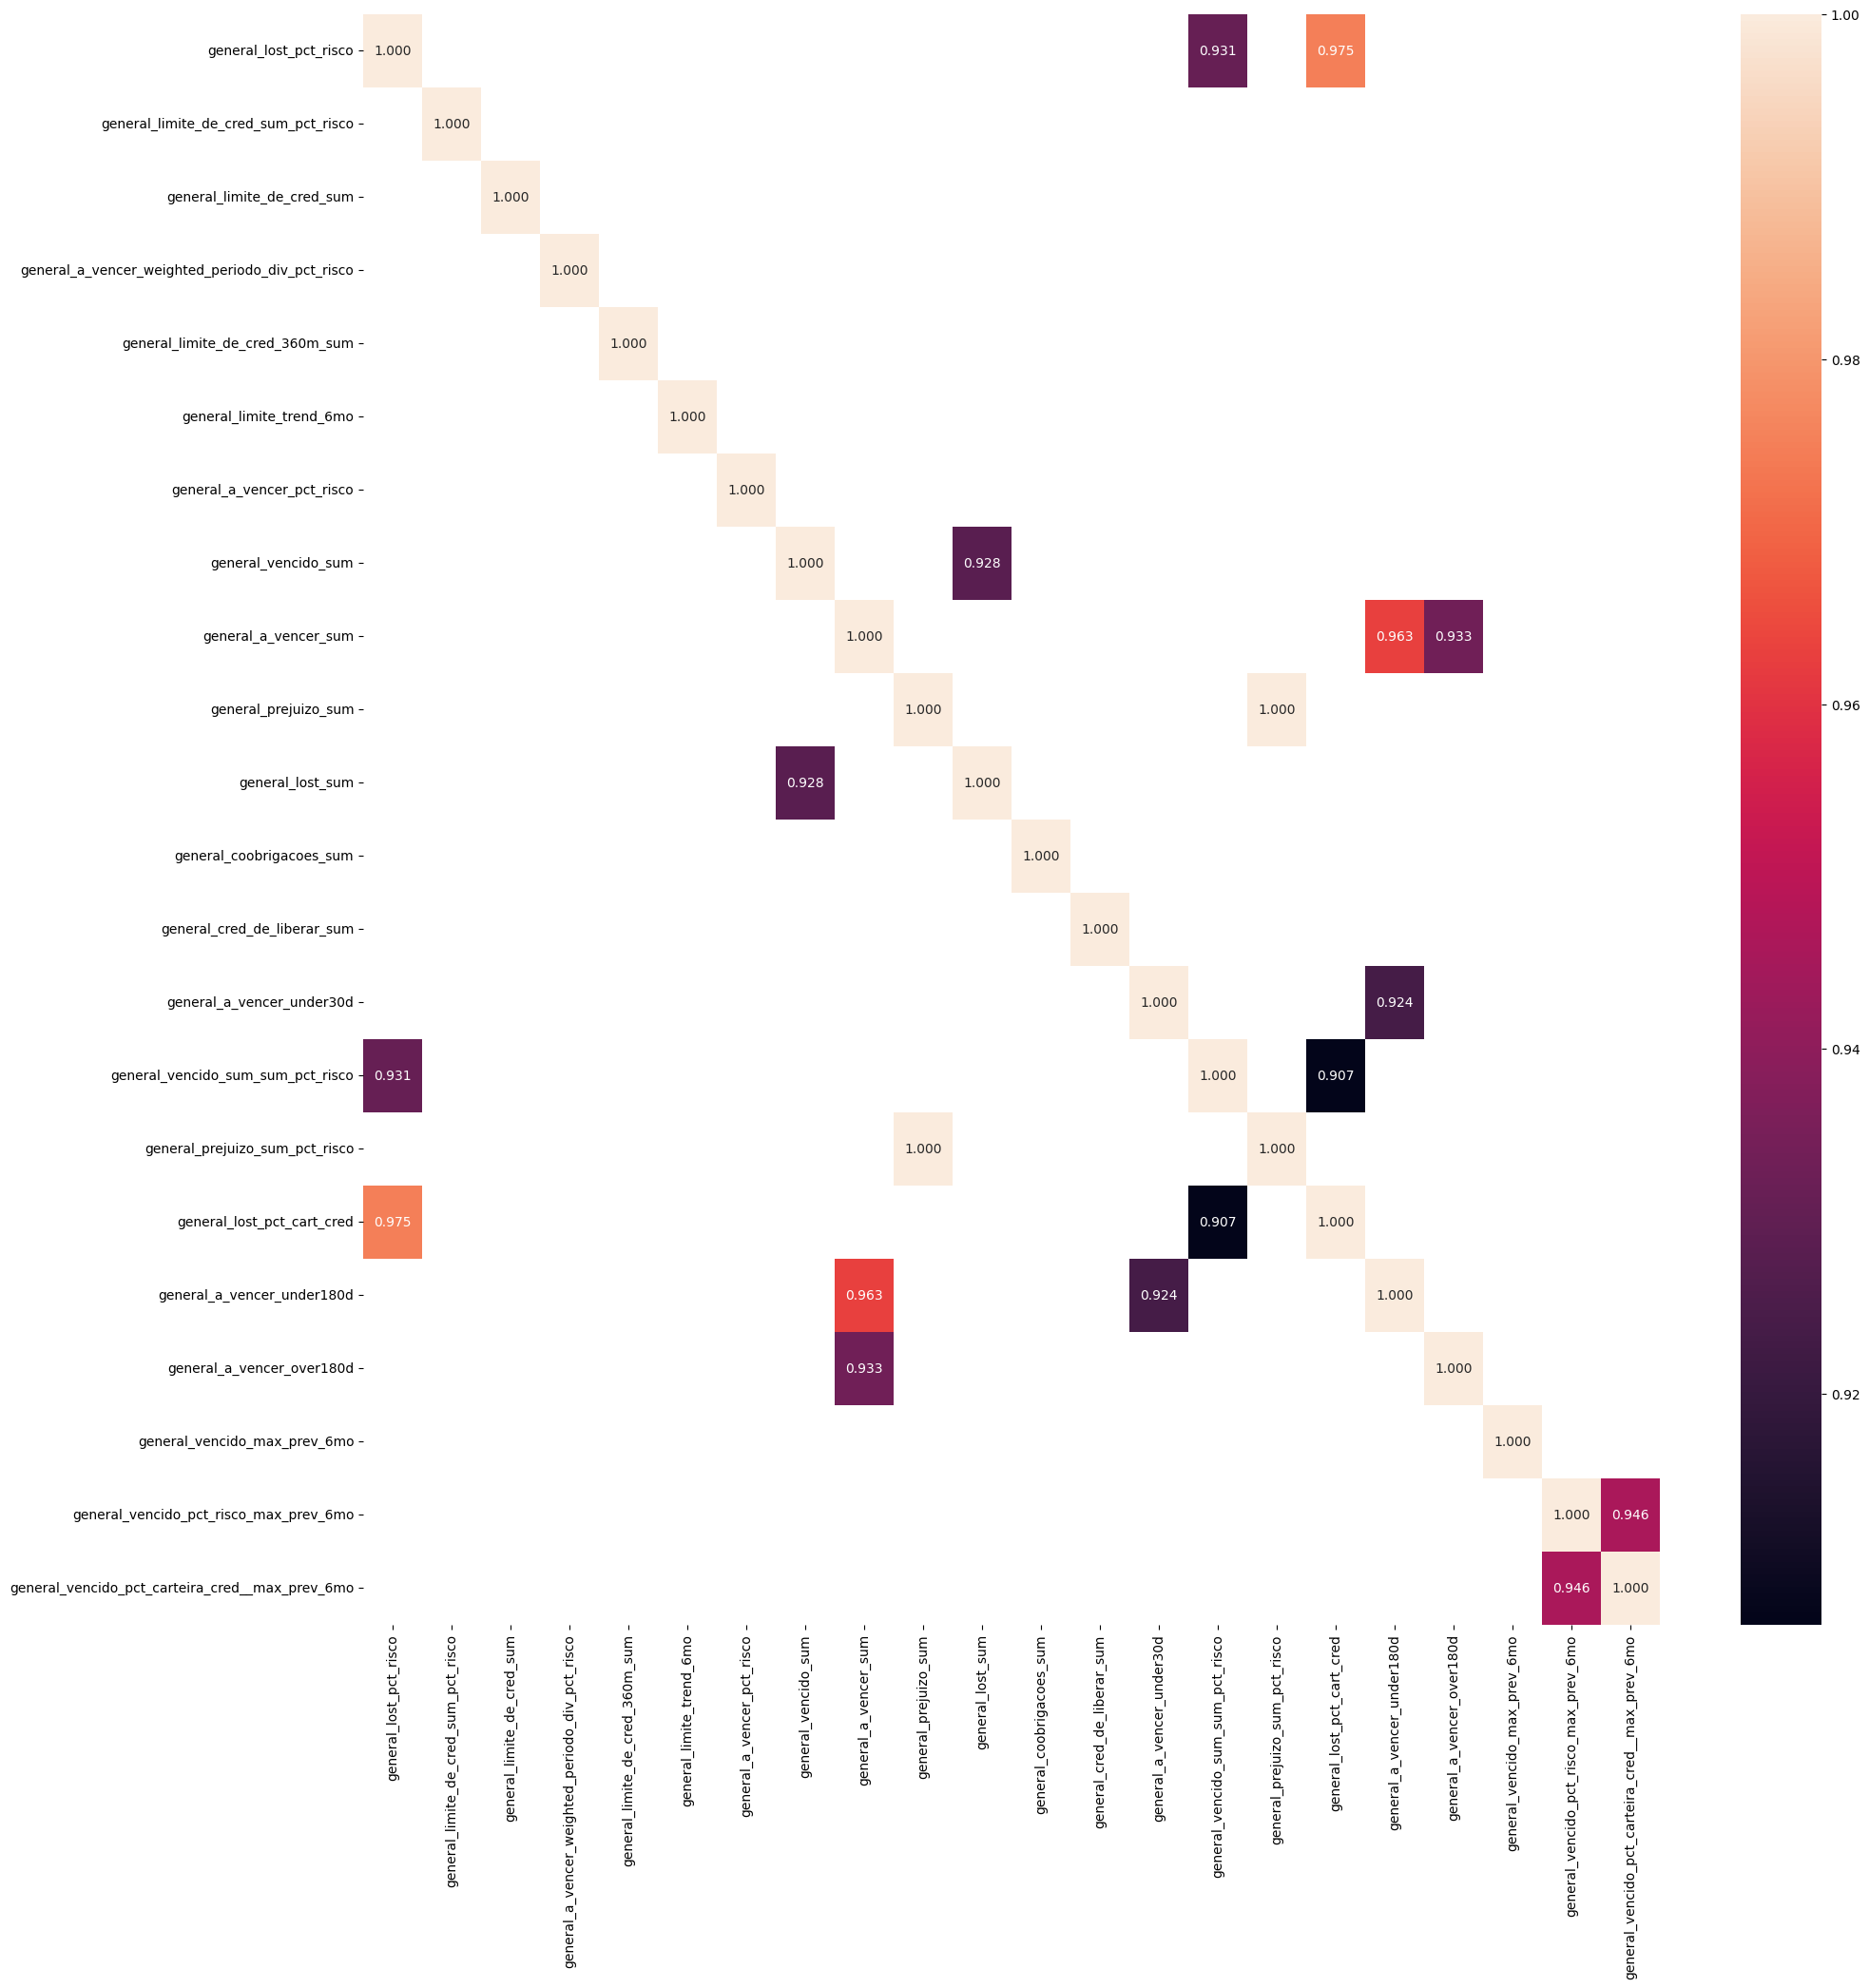

In [22]:
detailed_correlations1 = (
    train[general_features]
    .query(general_features_diff_zero_query__or)
    ).corr('spearman')

plt.figure(figsize=(len(general_features), len(general_features)))
sns.heatmap(detailed_correlations1, annot=True, fmt='.3f', mask=detailed_correlations1 < 0.9)
plt.show()

In [23]:
# pairs of features in detailed_correlations1 that have a correlation greater than 0.9
general_feature_pairs_with_high_correlation = []
for i in range(detailed_correlations1.shape[0]):
    for j in range(i):
        if detailed_correlations1.iloc[i, j] > 0.9:
            general_feature_pairs_with_high_correlation.append((detailed_correlations1.index[i], detailed_correlations1.columns[j]))

general_feature_pairs_with_high_correlation

[('general_lost_sum', 'general_vencido_sum'),
 ('general_vencido_sum_sum_pct_risco', 'general_lost_pct_risco'),
 ('general_prejuizo_sum_pct_risco', 'general_prejuizo_sum'),
 ('general_lost_pct_cart_cred', 'general_lost_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_vencido_sum_sum_pct_risco'),
 ('general_a_vencer_under180d', 'general_a_vencer_sum'),
 ('general_a_vencer_under180d', 'general_a_vencer_under30d'),
 ('general_a_vencer_over180d', 'general_a_vencer_sum'),
 ('general_vencido_pct_carteira_cred__max_prev_6mo',
  'general_vencido_pct_risco_max_prev_6mo')]

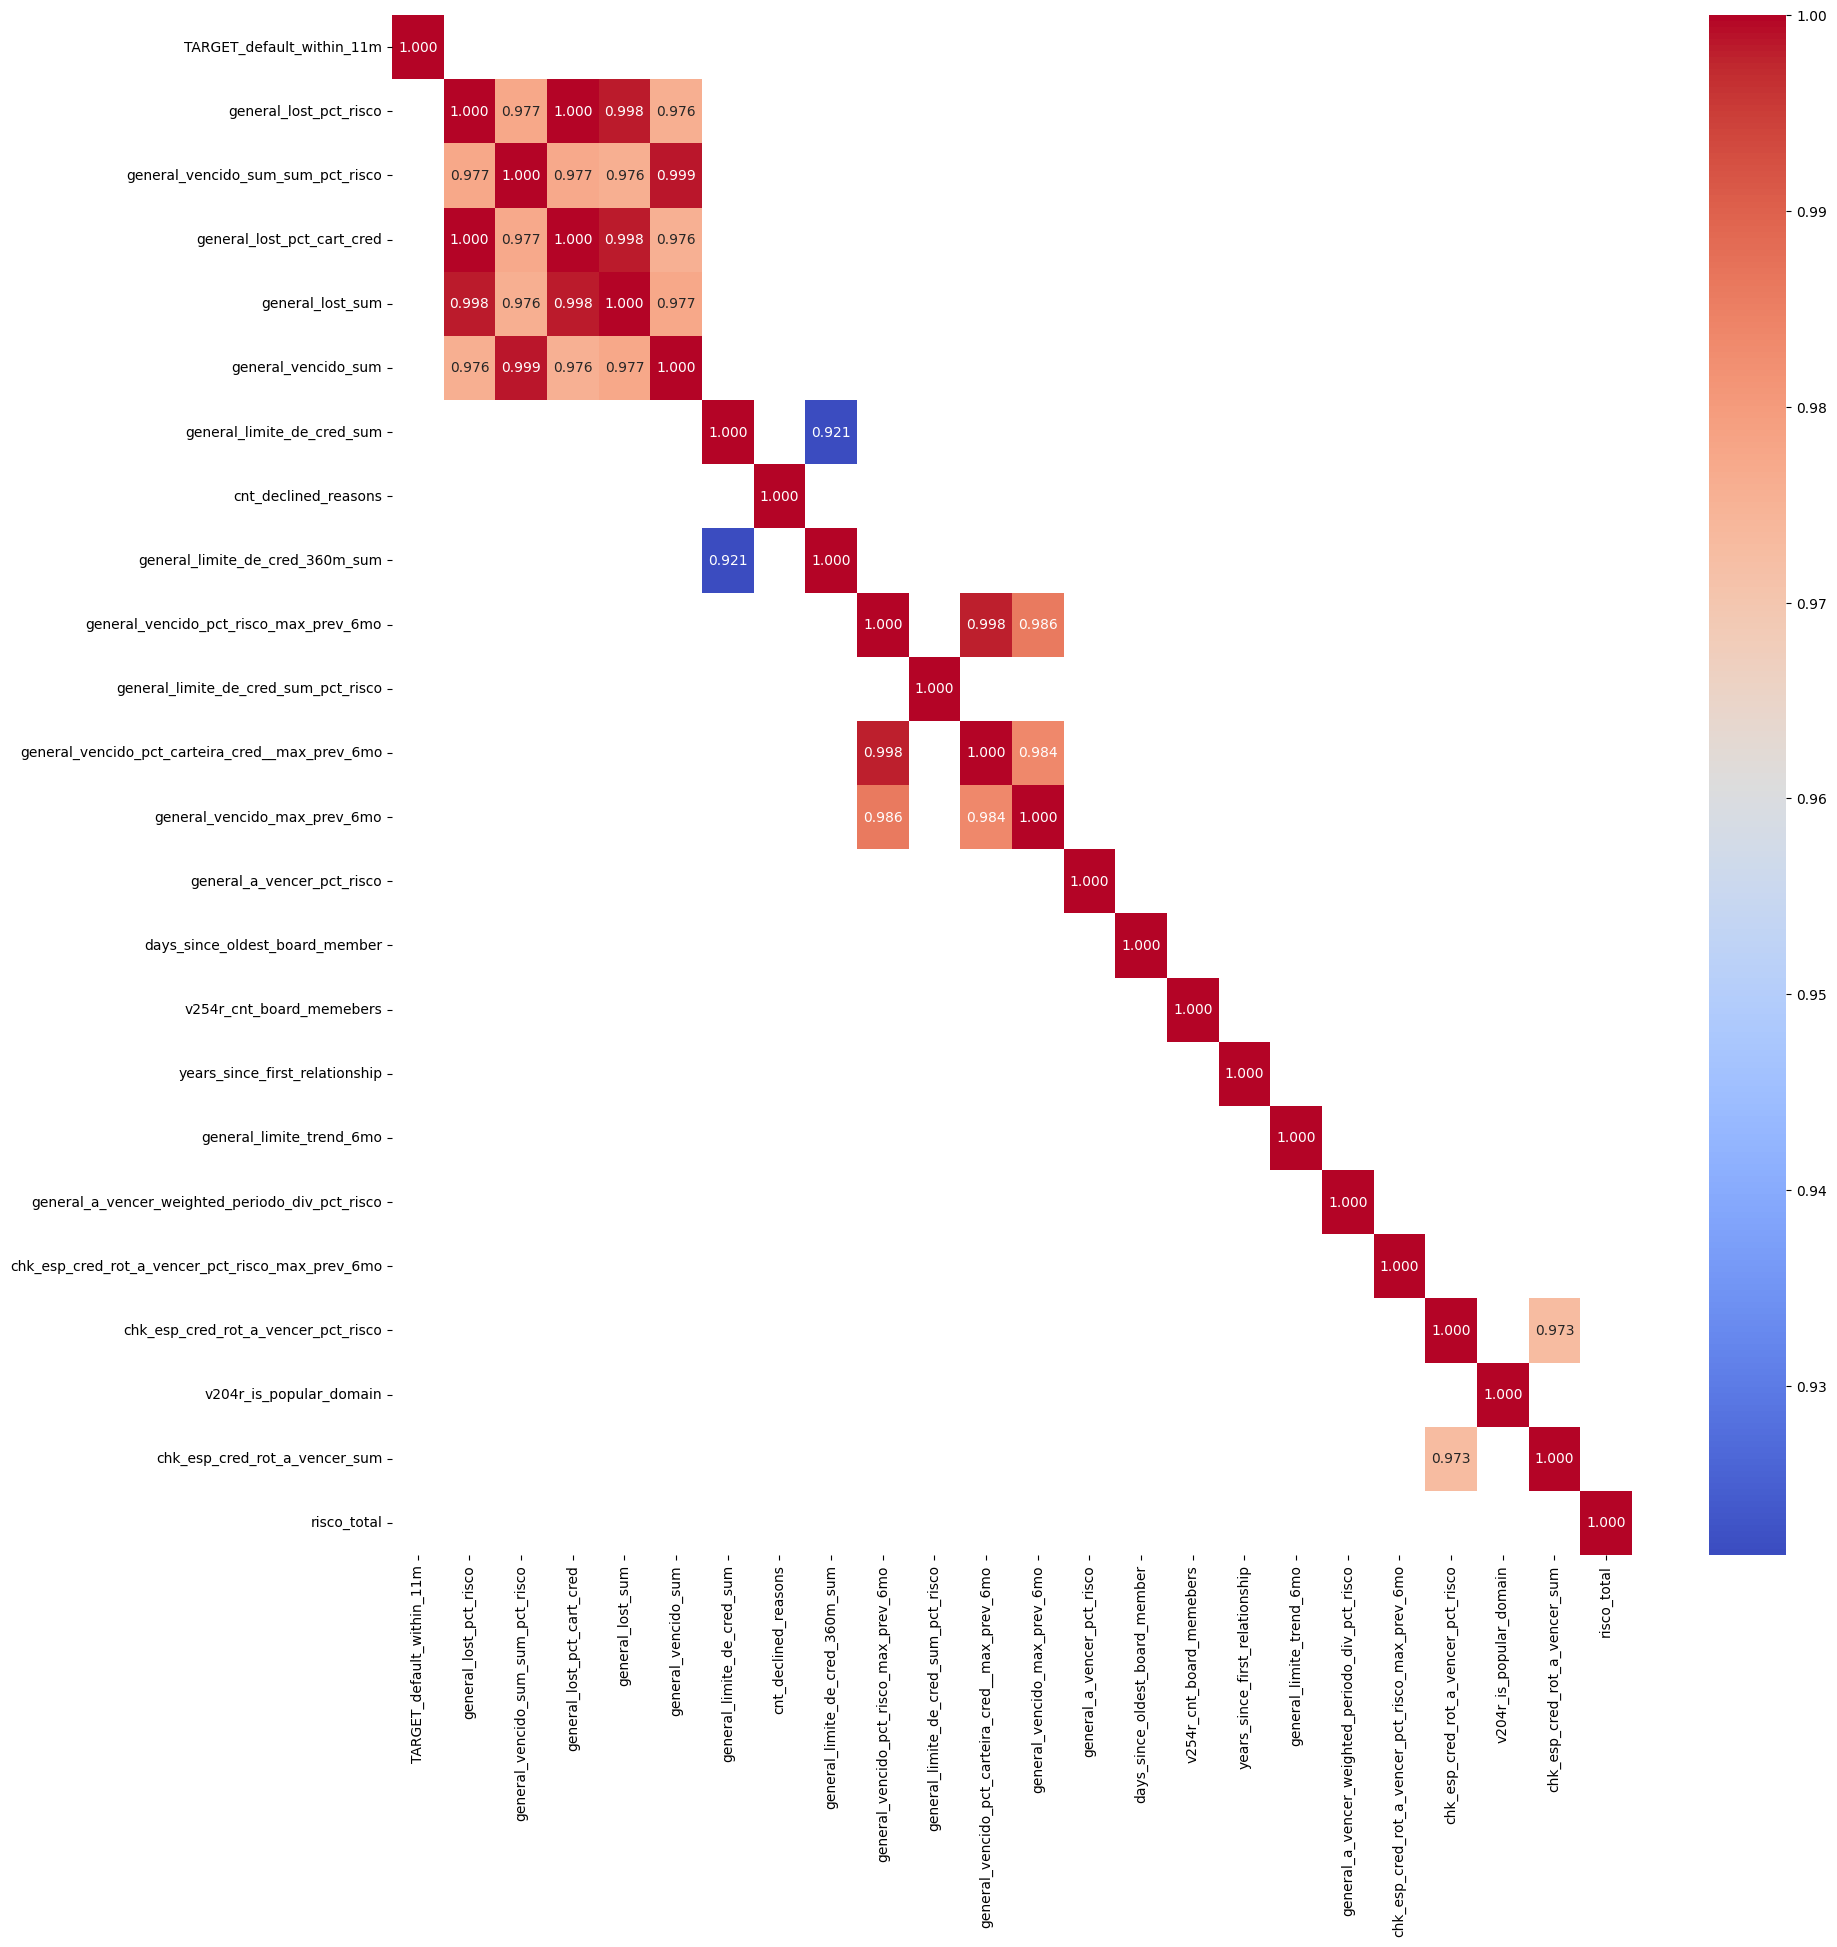

In [24]:
# Plotting the Pearson's correlation matrix
correlations = train[[target] + features].corr('spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.3f', mask=correlations < 0.9)
plt.show()

In [25]:
correlations_features_with_high_correlation = []
for i in range(correlations.shape[0]):
    for j in range(i):
        if correlations.iloc[i, j] > 0.9:
            correlations_features_with_high_correlation.append((correlations.index[i], correlations.columns[j]))

correlations_features_with_high_correlation

[('general_vencido_sum_sum_pct_risco', 'general_lost_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_lost_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_vencido_sum_sum_pct_risco'),
 ('general_lost_sum', 'general_lost_pct_risco'),
 ('general_lost_sum', 'general_vencido_sum_sum_pct_risco'),
 ('general_lost_sum', 'general_lost_pct_cart_cred'),
 ('general_vencido_sum', 'general_lost_pct_risco'),
 ('general_vencido_sum', 'general_vencido_sum_sum_pct_risco'),
 ('general_vencido_sum', 'general_lost_pct_cart_cred'),
 ('general_vencido_sum', 'general_lost_sum'),
 ('general_limite_de_cred_360m_sum', 'general_limite_de_cred_sum'),
 ('general_vencido_pct_carteira_cred__max_prev_6mo',
  'general_vencido_pct_risco_max_prev_6mo'),
 ('general_vencido_max_prev_6mo', 'general_vencido_pct_risco_max_prev_6mo'),
 ('general_vencido_max_prev_6mo',
  'general_vencido_pct_carteira_cred__max_prev_6mo'),
 ('chk_esp_cred_rot_a_vencer_sum', 'chk_esp_cred_rot_a_vencer_pct_risco')]

In [26]:
# pairs present in both correlations_features_with_high_correlation and general_feature_pairs_with_high_correlation
general_features_to_remove = set(correlations_features_with_high_correlation) & set(general_feature_pairs_with_high_correlation)
general_features_to_remove
# we may remove these features as even considering values other than zero they are highly correlated

{('general_lost_pct_cart_cred', 'general_lost_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_vencido_sum_sum_pct_risco'),
 ('general_vencido_pct_carteira_cred__max_prev_6mo',
  'general_vencido_pct_risco_max_prev_6mo'),
 ('general_vencido_sum_sum_pct_risco', 'general_lost_pct_risco')}

In [27]:
features_to_remove = []
for feature_idx, feature1 in enumerate(features):
    for feature2 in features[feature_idx + 1:]:
        if abs(correlations[feature1][feature2]) > 0.9:
            if 'general' in feature1 and 'general' in feature2 and set([feature1, feature2]) in general_features_to_remove:        
                print(f'{feature1} and {feature2} have a correlation greater than 0.9')
                print(f'removing {feature2} from the list of features')
                features_to_remove.append(feature2)
            elif 'general' not in feature1 or 'general' not in feature2:
                print(f'{feature1} and {feature2} have a correlation greater than 0.9')
                print(f'removing {feature2} from the list of features')
                features_to_remove.append(feature2)

chk_esp_cred_rot_a_vencer_pct_risco and chk_esp_cred_rot_a_vencer_sum have a correlation greater than 0.9
removing chk_esp_cred_rot_a_vencer_sum from the list of features


In [28]:
features_to_keep = list(set(features) - set(features_to_remove))
features_to_keep

['general_vencido_sum',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'general_limite_trend_6mo',
 'general_vencido_sum_sum_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'v204r_is_popular_domain',
 'general_vencido_max_prev_6mo',
 'days_since_oldest_board_member',
 'years_since_first_relationship',
 'general_lost_pct_risco',
 'v254r_cnt_board_memebers',
 'general_limite_de_cred_sum',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'risco_total',
 'general_lost_sum',
 'general_limite_de_cred_sum_pct_risco',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_lost_pct_cart_cred',
 'general_limite_de_cred_360m_sum',
 'general_vencido_pct_risco_max_prev_6mo',
 'cnt_declined_reasons',
 'general_a_vencer_pct_risco']

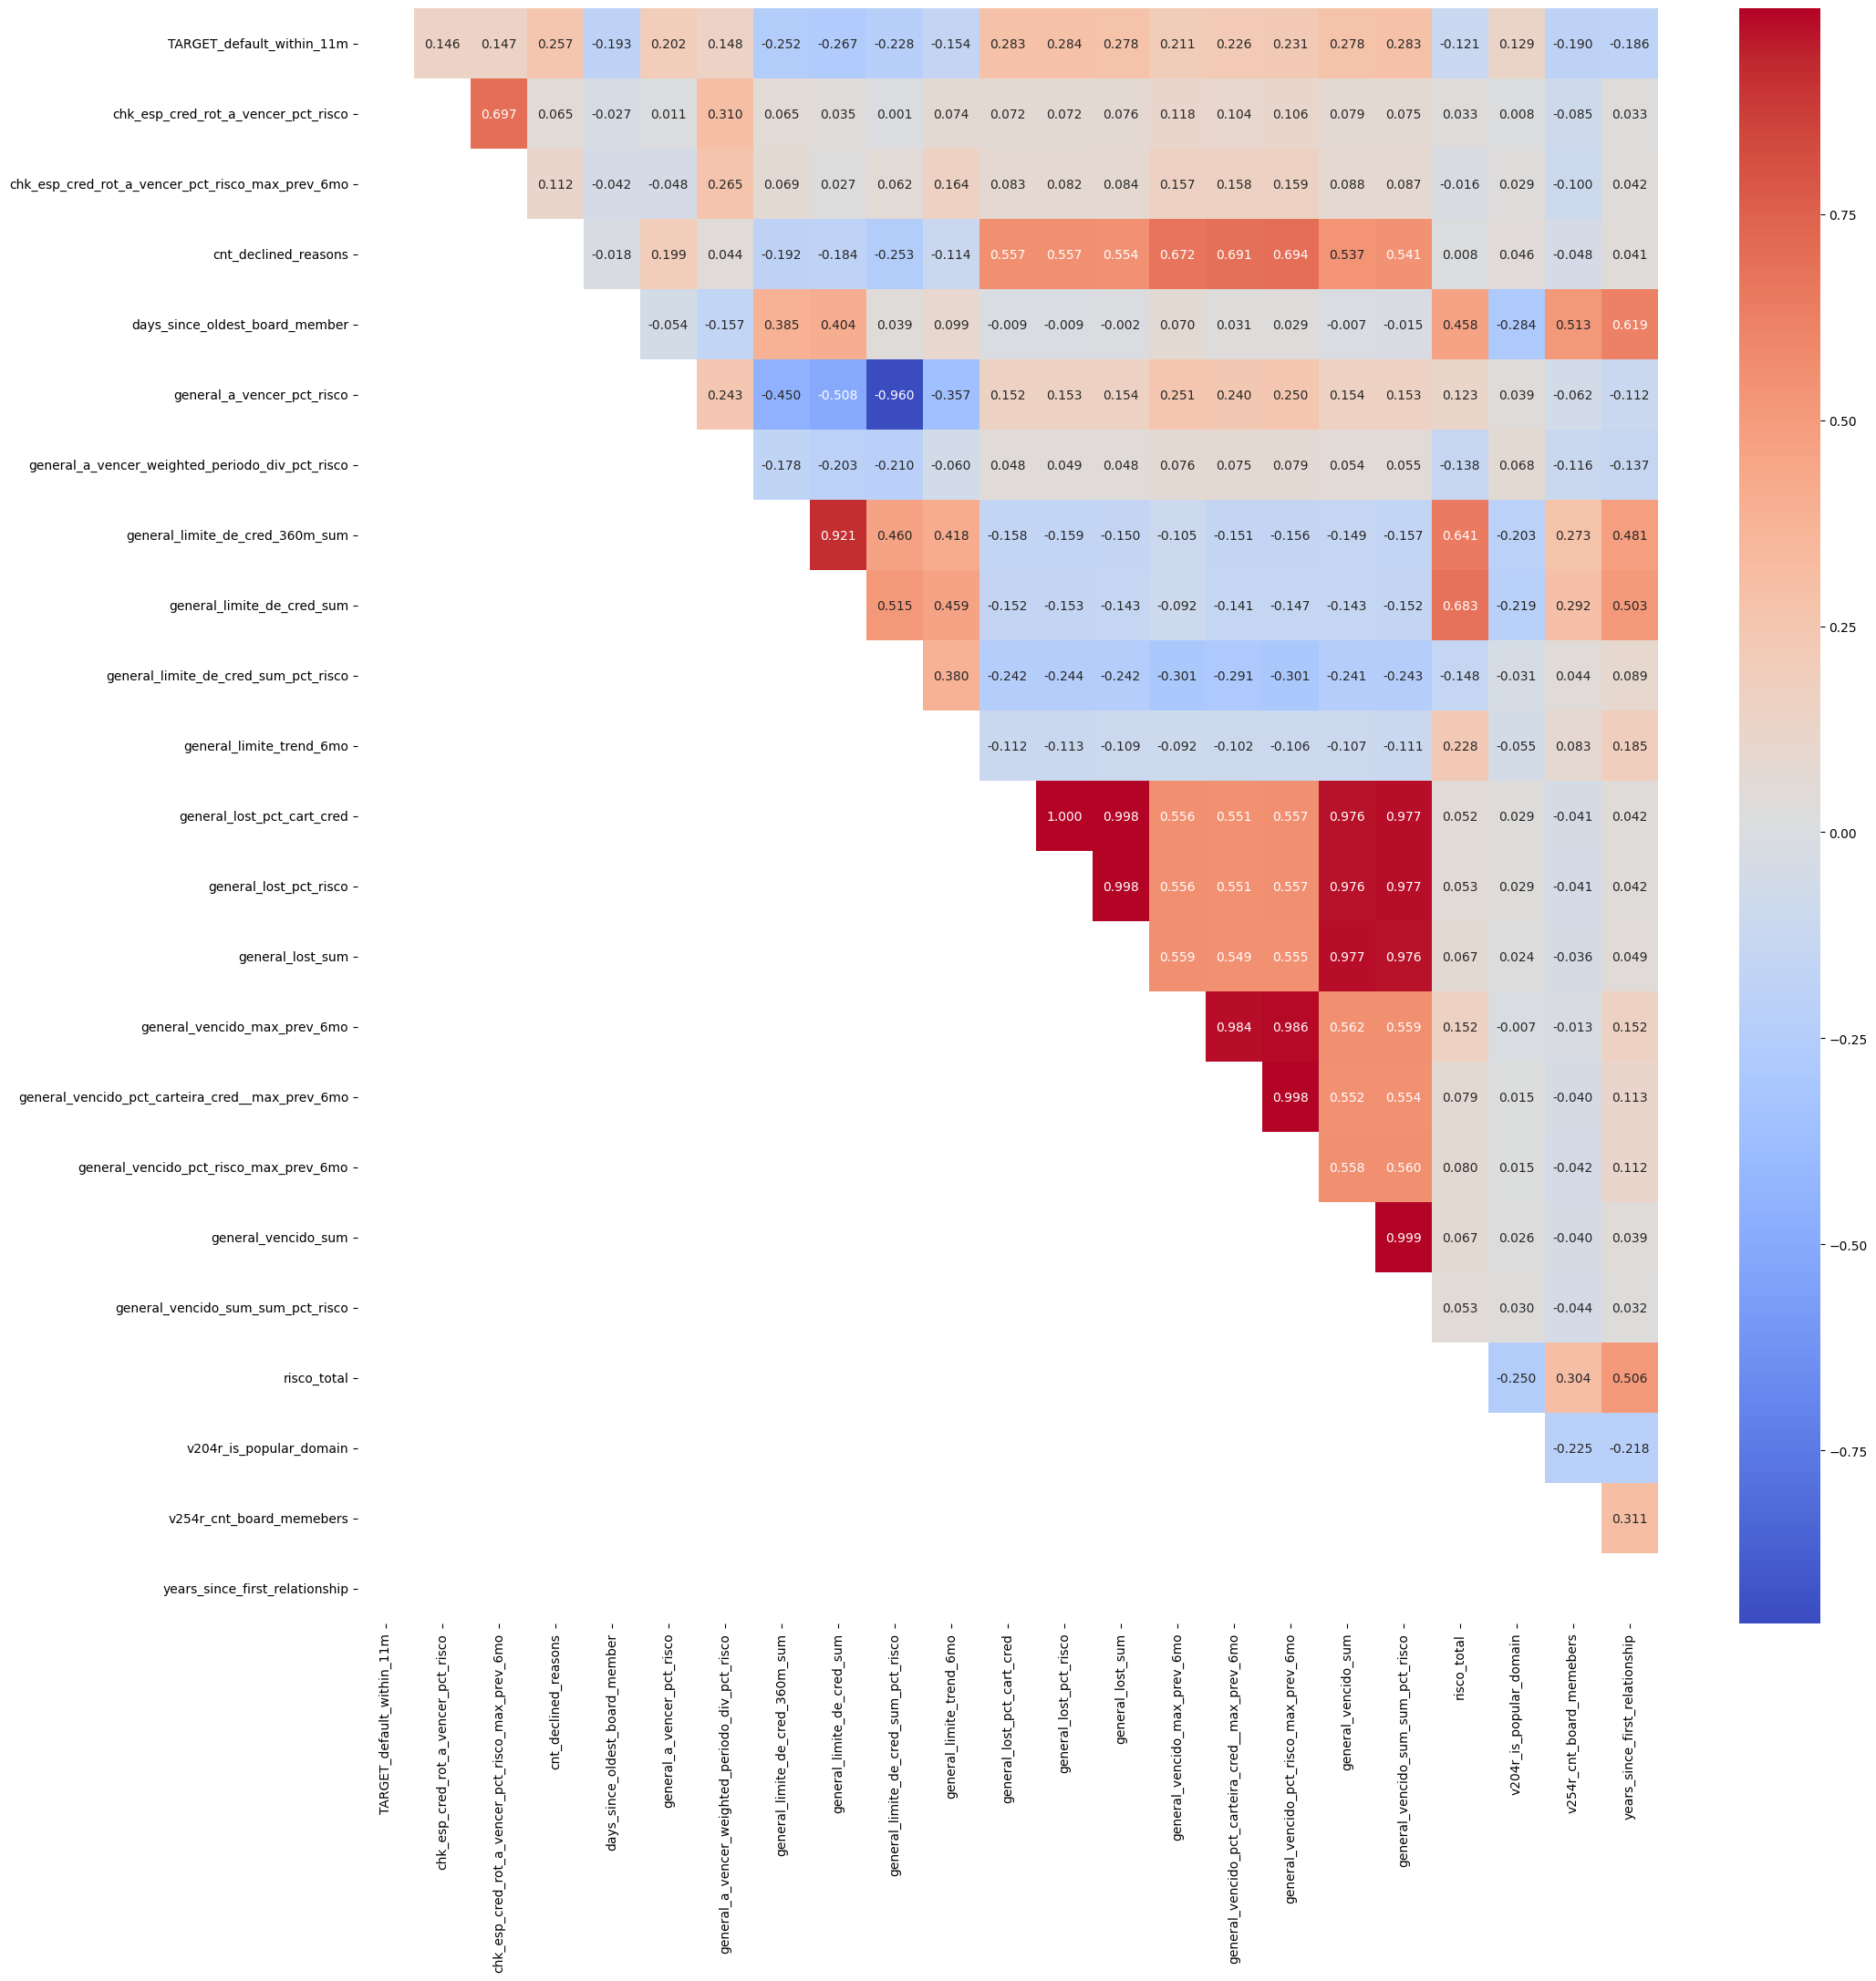

In [29]:
# Plotting the Pearson's correlation matrix
correlations = train[[target] + sorted(features_to_keep)].corr('spearman')
plt.figure(figsize=(len(features_to_keep) + 1, len(features_to_keep) + 1))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.3f', mask=np.tril(correlations))
plt.show()

## Feature Distribution Plots

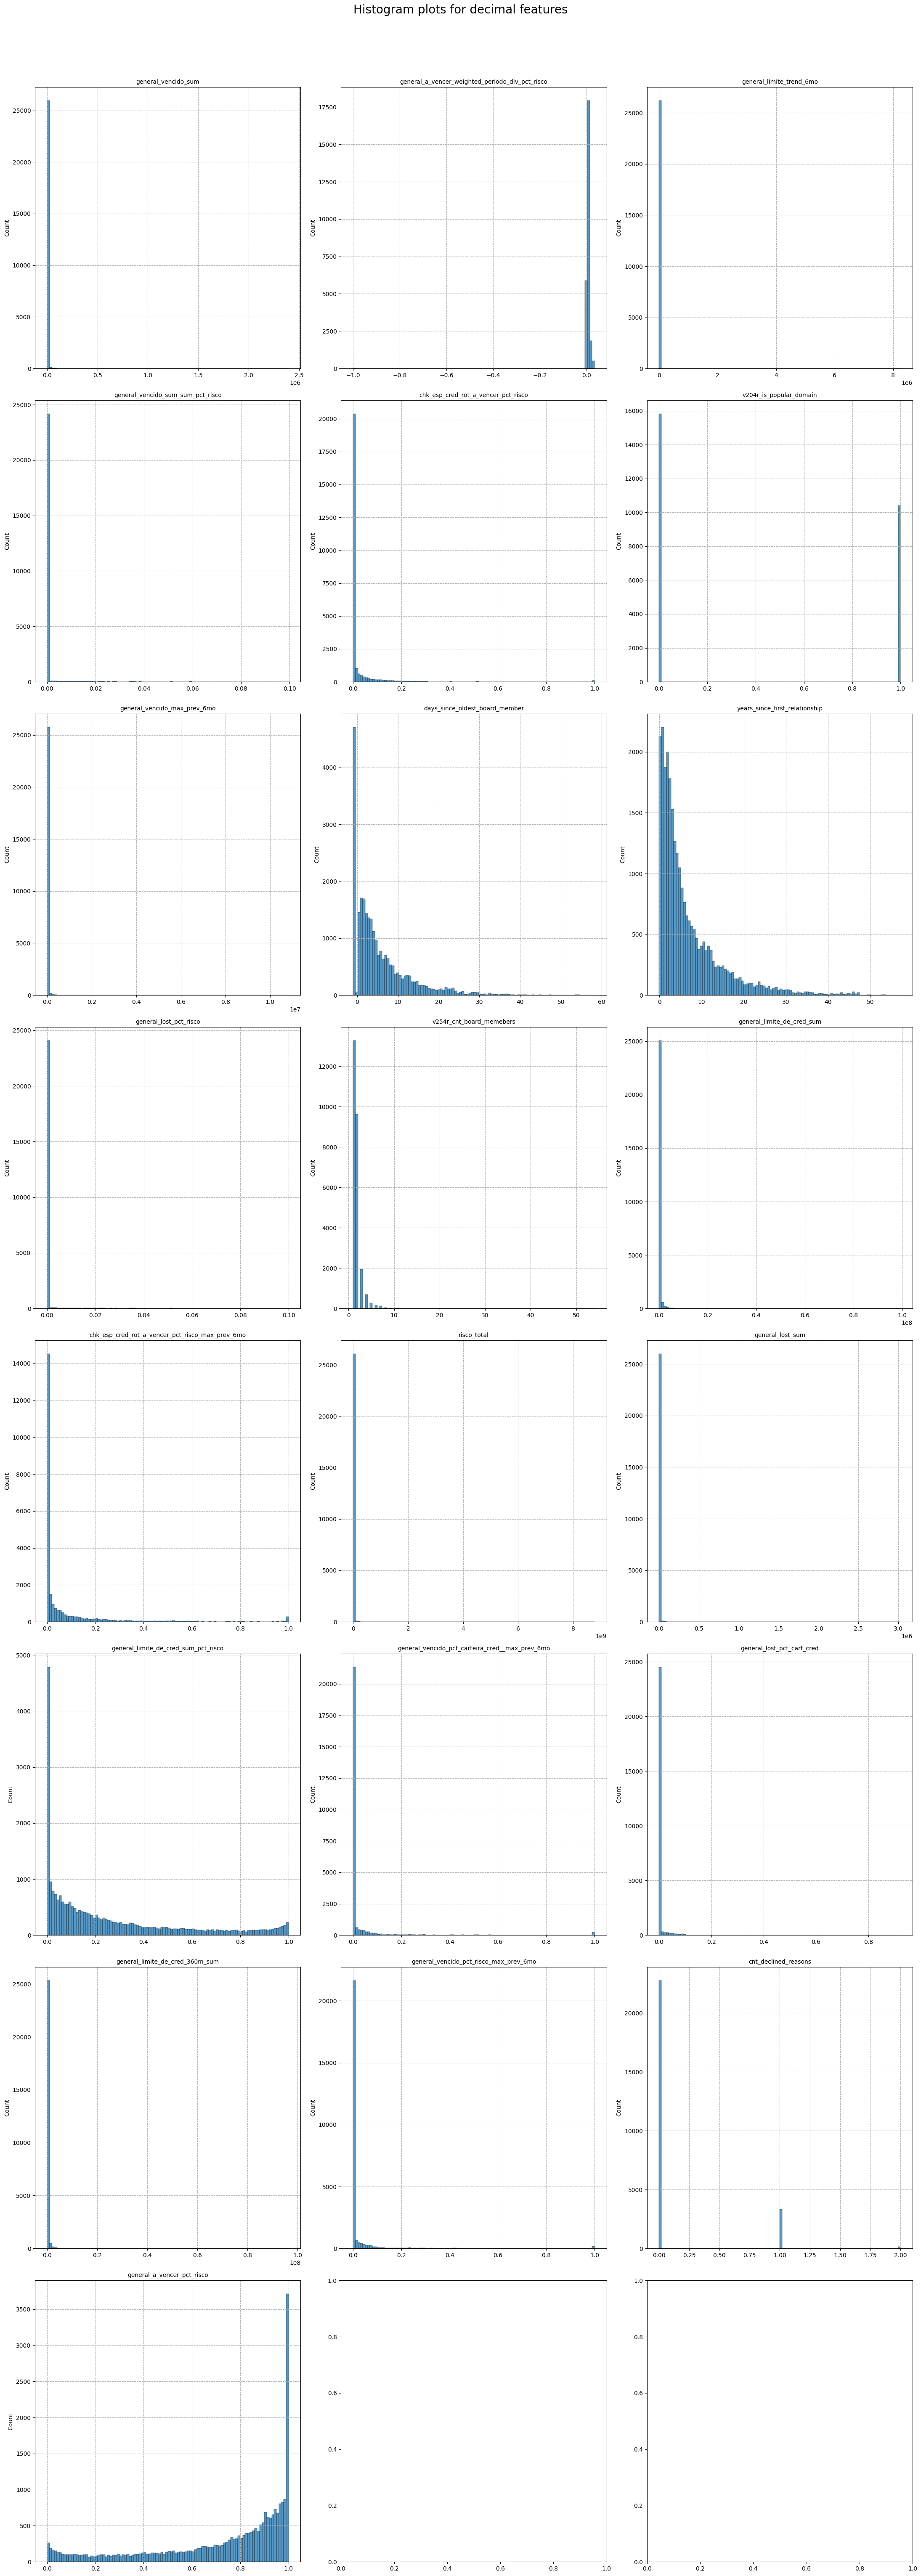

In [30]:
ncols = 3
nrows = int(np.ceil(len(features_to_keep) / ncols))
fig, ax = plt.subplots(nrows, ncols, figsize=(len(features_to_keep), 60), tight_layout=True)
for idx, feature in enumerate(features_to_keep):
    ax_id = ax[idx // ncols, idx % ncols]
    sns.histplot(train[feature], legend=False, ax=ax_id, bins=100)
    ax_id.set_title(feature, fontsize=10)
    ax_id.grid(linestyle='--')
    ax_id.set_xlabel('')

fig.suptitle('Histogram plots for decimal features', fontsize=20, y=1.02)
plt.show()

In [31]:
# some of the features above may have extreme values that require further investigation

In [32]:
features_to_keep

['general_vencido_sum',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'general_limite_trend_6mo',
 'general_vencido_sum_sum_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'v204r_is_popular_domain',
 'general_vencido_max_prev_6mo',
 'days_since_oldest_board_member',
 'years_since_first_relationship',
 'general_lost_pct_risco',
 'v254r_cnt_board_memebers',
 'general_limite_de_cred_sum',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'risco_total',
 'general_lost_sum',
 'general_limite_de_cred_sum_pct_risco',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_lost_pct_cart_cred',
 'general_limite_de_cred_360m_sum',
 'general_vencido_pct_risco_max_prev_6mo',
 'cnt_declined_reasons',
 'general_a_vencer_pct_risco']

In [33]:
train['general_a_vencer_weighted_periodo_div_pct_risco'].describe()

count    26218.000000
mean         0.004962
std          0.028260
min         -1.000000
25%          0.002489
50%          0.004071
75%          0.007036
max          0.033333
Name: general_a_vencer_weighted_periodo_div_pct_risco, dtype: float64

In [34]:
train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0][keys + ['general_a_vencer_weighted_periodo_div_pct_risco', target]]

,fake_cnpj,date_reference,general_a_vencer_weighted_periodo_div_pct_risco,TARGET_default_within_11m
6445,8144,2021-04-01,-1.0,0
6446,8144,2020-10-01,-1.0,0
6447,8144,2021-01-01,-1.0,0
6448,8144,2020-09-01,-1.0,0
6449,8144,2020-11-01,-1.0,0
6450,8144,2021-05-01,-1.0,0
6451,8144,2020-12-01,-1.0,0
6452,8144,2021-02-01,-1.0,0
6453,8144,2021-03-01,-1.0,0
9006,22379,2021-05-01,-1.0,0


In [35]:
ids_to_check = train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0]['fake_cnpj'].unique()

In [36]:
train[train['fake_cnpj'].isin(ids_to_check)]['fake_cnpj'].shape, train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0]['fake_cnpj'].shape

((20,), (20,))

In [37]:
train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0][target].value_counts(1)
# I will remove these cases from the dataset, as it should not impact the model's performance
# Understanding what this -1.0 value means would be important, but we will continue with the model building process.

TARGET_default_within_11m
0    0.85
1    0.15
Name: proportion, dtype: float64

In [38]:
train = train[train['general_a_vencer_weighted_periodo_div_pct_risco'] >= 0]

In [39]:
train['general_vencido_sum_sum_pct_risco'].describe()

count    26198.000000
mean         0.002685
std          0.011906
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.099594
Name: general_vencido_sum_sum_pct_risco, dtype: float64

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


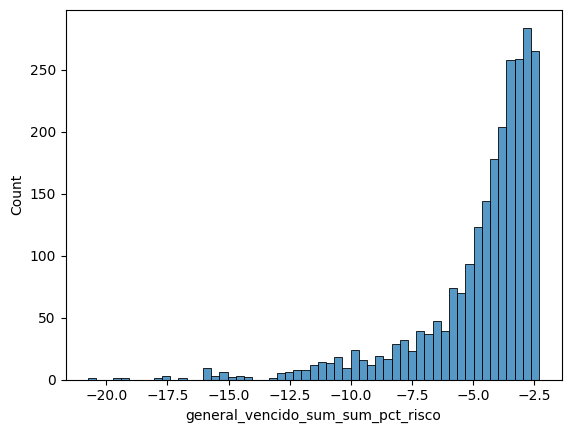

In [40]:
sns.histplot(np.log(train['general_vencido_sum_sum_pct_risco']))
plt.show()

# a log transformation for this feature may be useful

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


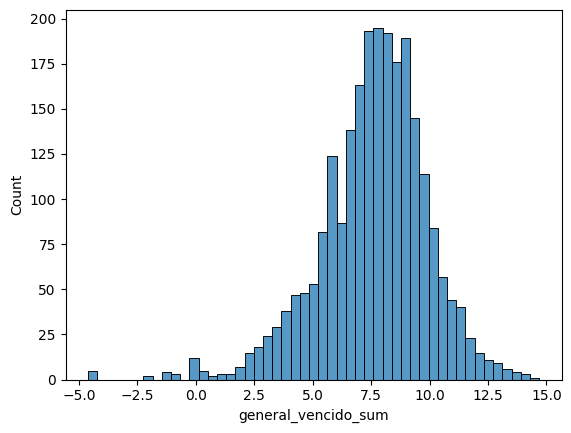

In [41]:
sns.histplot(np.log(train['general_vencido_sum']))
plt.show()

# a log transformation for this feature may be useful

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


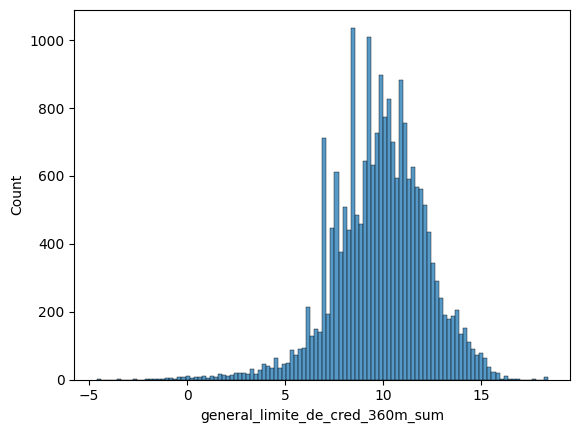

In [42]:
sns.histplot(np.log(train['general_limite_de_cred_360m_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


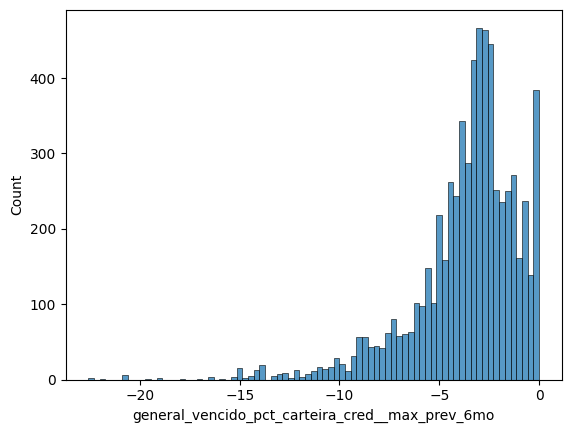

In [43]:
sns.histplot(np.log(train['general_vencido_pct_carteira_cred__max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


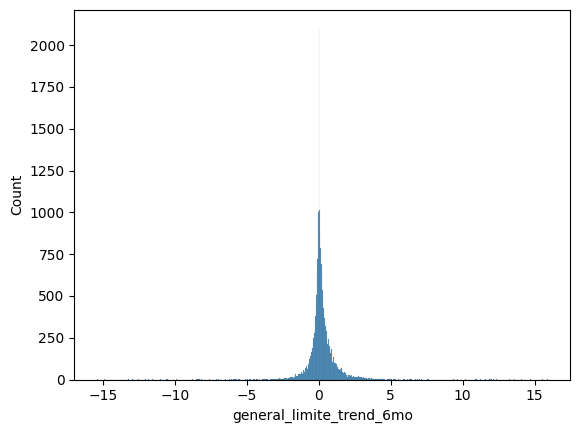

In [44]:
sns.histplot(np.log(train['general_limite_trend_6mo']))
plt.show()
# heavy tailed distribution

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


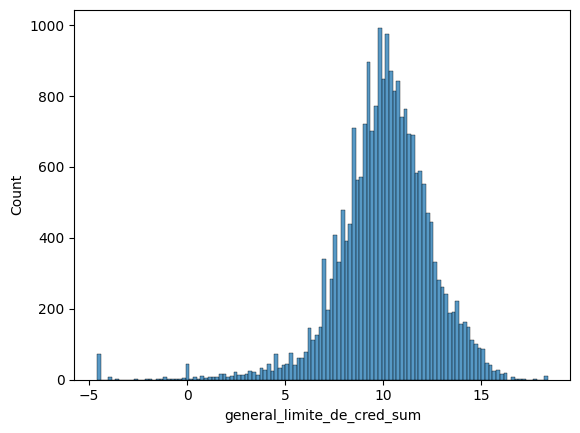

In [45]:
sns.histplot(np.log(train['general_limite_de_cred_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


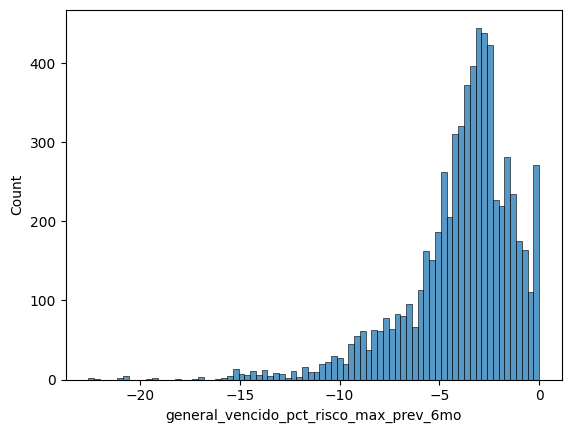

In [46]:
sns.histplot(np.log(train['general_vencido_pct_risco_max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


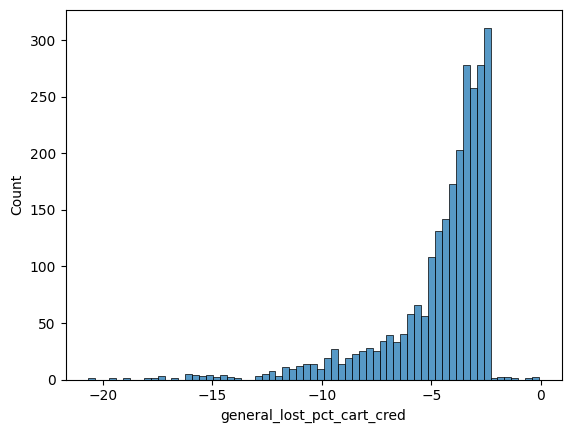

In [47]:
sns.histplot(np.log(train['general_lost_pct_cart_cred']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


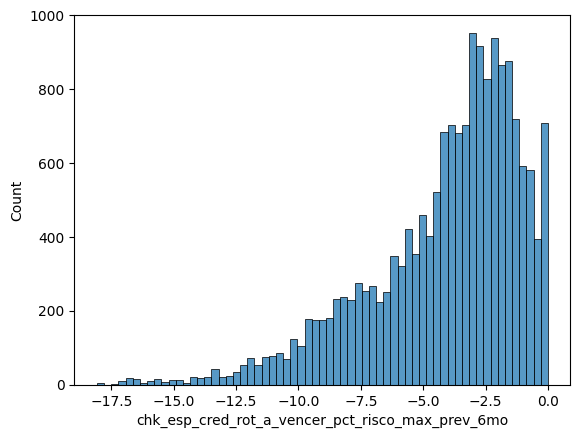

In [48]:
sns.histplot(np.log(train['chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


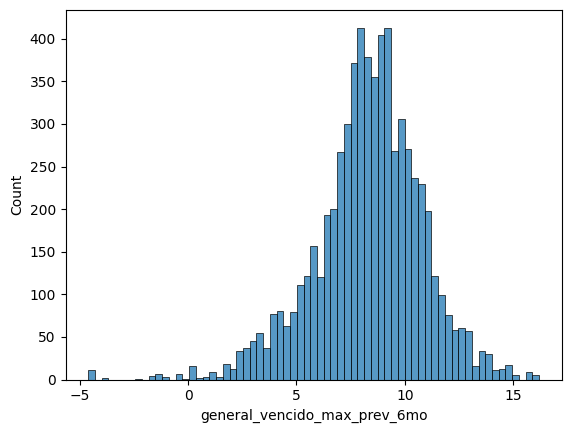

In [49]:
sns.histplot(np.log(train['general_vencido_max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


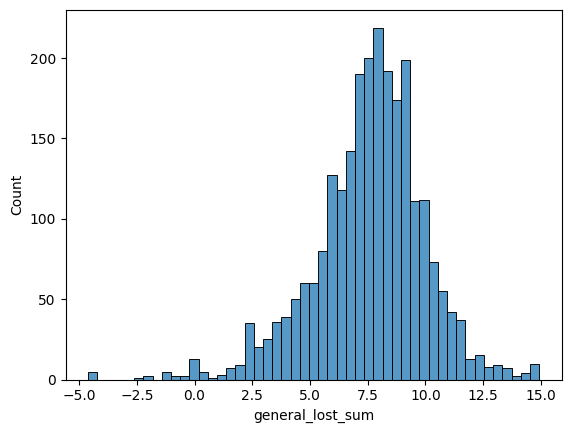

In [50]:
sns.histplot(np.log(train['general_lost_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


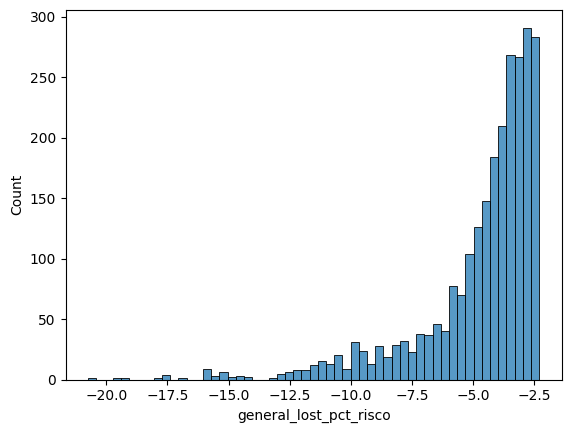

In [51]:
sns.histplot(np.log(train['general_lost_pct_risco']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


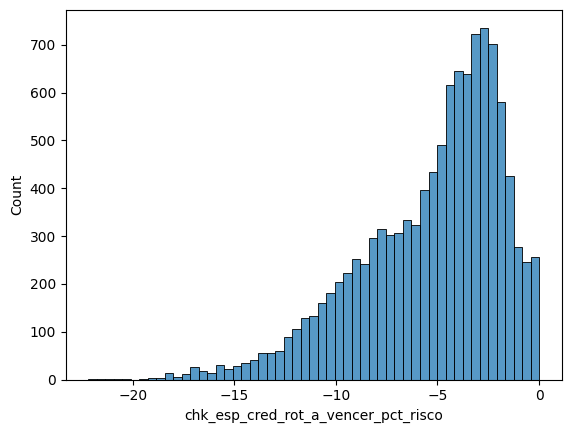

In [52]:
sns.histplot(np.log(train['chk_esp_cred_rot_a_vencer_pct_risco']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


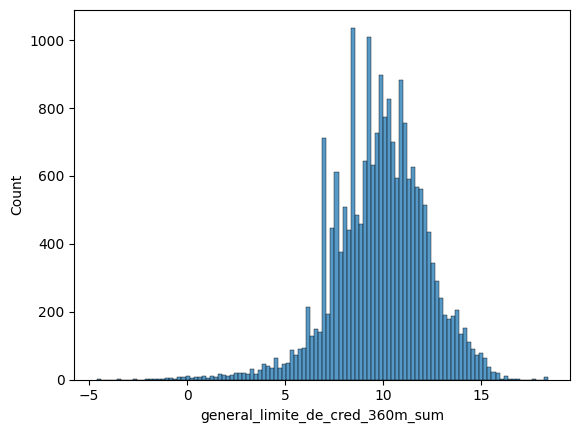

In [53]:
sns.histplot(np.log(train['general_limite_de_cred_360m_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


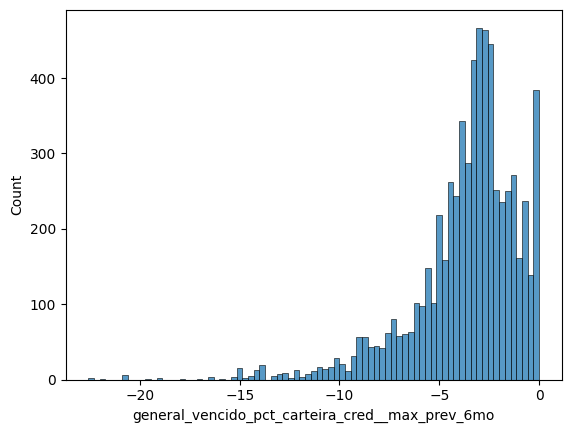

In [54]:
sns.histplot(np.log(train['general_vencido_pct_carteira_cred__max_prev_6mo']))
plt.show()

In [55]:
# calculating feature moments
skewness = train[features_to_keep].skew()
kurtosis = train[features_to_keep].kurt()

In [56]:
# skewness: negative values indicate left skewness, positive values indicate right skewness, and could be interpreted as follows:
# 0: symmetric distribution
# 0 to -1: moderately left skewed
# 0 to 1: moderately right skewed
# <-1: highly left skewed
# >1: highly right skewed

skewness.sort_values(ascending=False)

general_limite_trend_6mo                            104.804550
risco_total                                          60.300266
general_vencido_sum                                  46.705822
general_limite_de_cred_360m_sum                      45.168285
general_limite_de_cred_sum                           41.508180
general_lost_sum                                     39.532589
general_vencido_max_prev_6mo                         32.485648
general_lost_pct_cart_cred                           18.649073
v254r_cnt_board_memebers                             13.886797
general_vencido_pct_risco_max_prev_6mo                5.998856
chk_esp_cred_rot_a_vencer_pct_risco                   5.761585
general_vencido_sum_sum_pct_risco                     5.286459
general_vencido_pct_carteira_cred__max_prev_6mo       5.252450
general_lost_pct_risco                                5.171704
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo      3.105693
cnt_declined_reasons                                  2

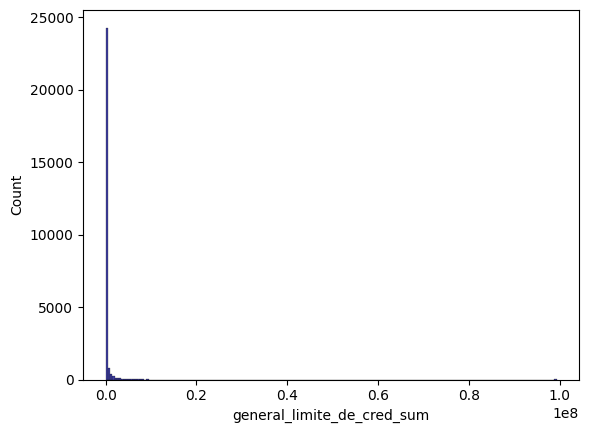

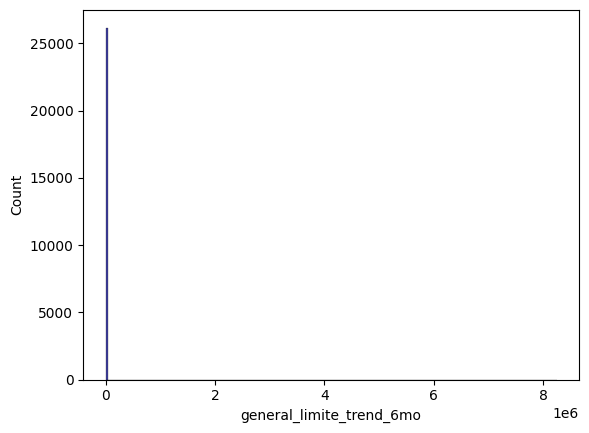

In [57]:
sns.histplot(train['general_limite_de_cred_sum'], bins=200, label='Moderately right skewed feature', color='navy')
plt.show()

sns.histplot(train['general_limite_trend_6mo'], bins=200, label='Highly right skewed feature', color='navy')
plt.show()

In [58]:
# kurtosis
# kurtosis > 0: May indicate outliers which are present away from the expected value of the distribution,
# and may be a sign of a heavy-tailed distribution.
kurtosis.sort_values(ascending=False)

general_limite_trend_6mo                            11999.604709
risco_total                                          4294.619851
general_vencido_sum                                  2969.031199
general_limite_de_cred_360m_sum                      2247.085521
general_limite_de_cred_sum                           1987.007214
general_lost_sum                                     1711.266164
general_vencido_max_prev_6mo                         1332.975401
general_lost_pct_cart_cred                            855.010297
v254r_cnt_board_memebers                              476.081520
general_vencido_pct_risco_max_prev_6mo                 39.809756
chk_esp_cred_rot_a_vencer_pct_risco                    38.265551
general_vencido_sum_sum_pct_risco                      29.514798
general_vencido_pct_carteira_cred__max_prev_6mo        29.421480
general_lost_pct_risco                                 28.125328
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo        9.991355
general_a_vencer_weighted

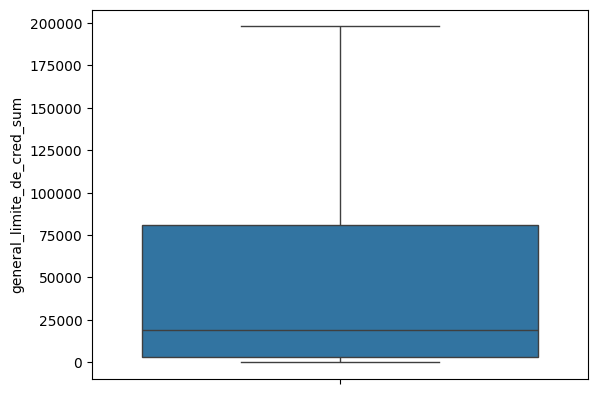

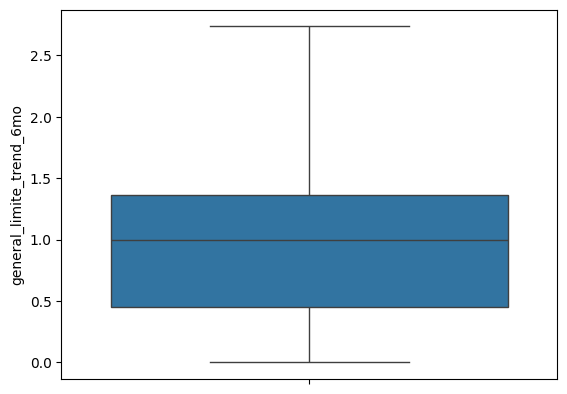

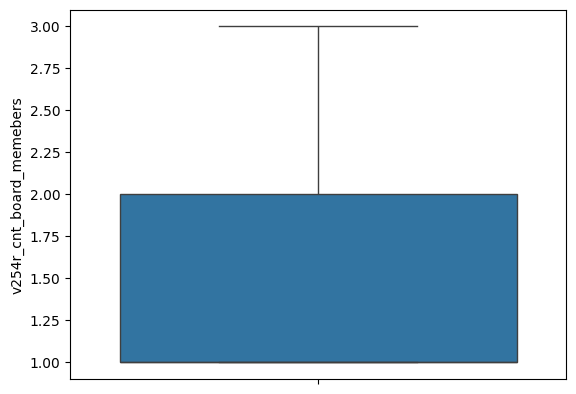

In [59]:
sns.boxplot(train['general_limite_de_cred_sum'], showfliers=False)
plt.show()

sns.boxplot(train['general_limite_trend_6mo'], showfliers=False)
plt.show()

sns.boxplot(train['v254r_cnt_board_memebers'], showfliers=False)
plt.show()

#### general_limite_de_cred_sum

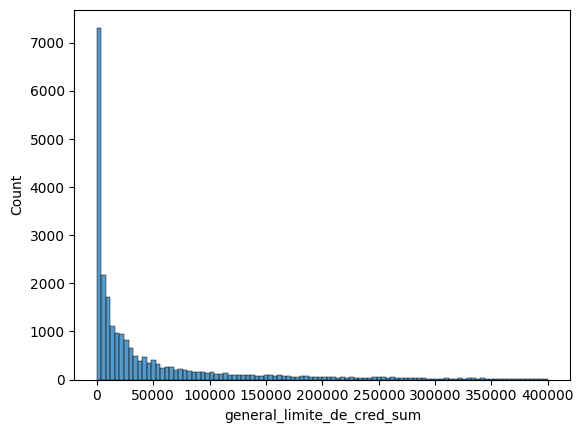

In [60]:
sns.histplot(train[train['general_limite_de_cred_sum'] <= 400000]['general_limite_de_cred_sum'], bins=100)
plt.show()

Percentage of values greater than 400000: 8.46%


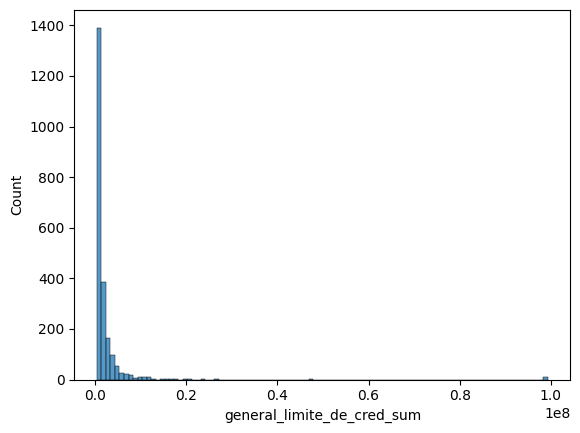

Percentage of values greater than 1000000: 4.37%


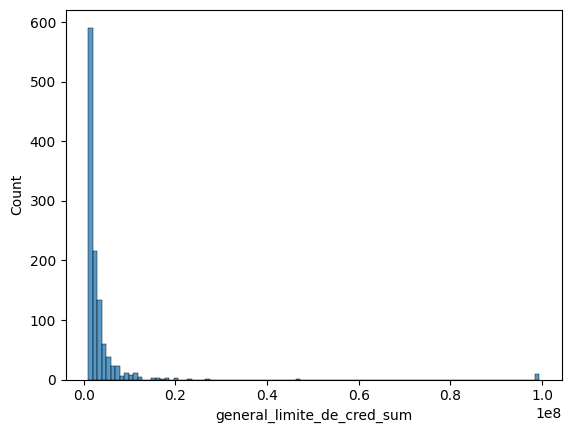

Percentage of values greater than 4000000: 0.75%


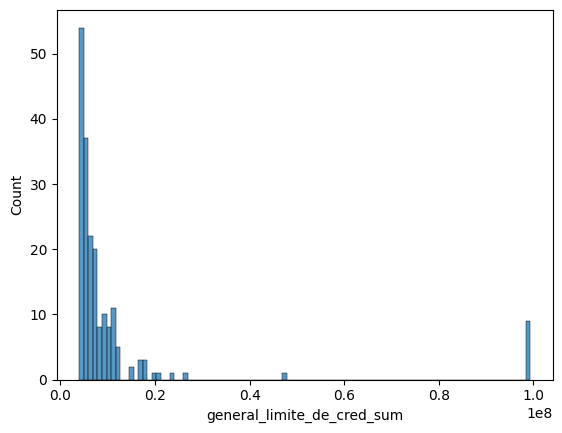

Percentage of values greater than 40000000: 0.04%


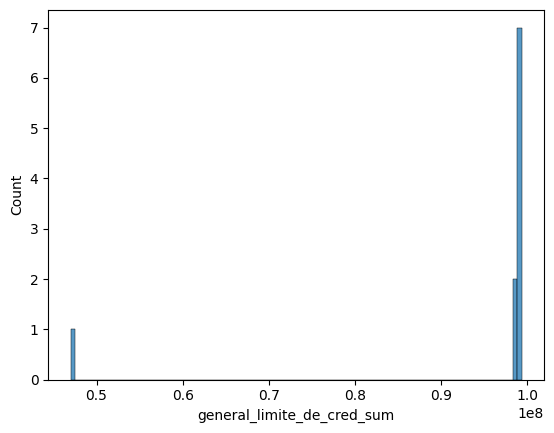

In [61]:
for value in [400000, 1000000, 4000000, 40000000]:
    print(f'Percentage of values greater than {value}: {(train["general_limite_de_cred_sum"] > value).value_counts(1)[True]:.2%}')
    sns.histplot(train[train['general_limite_de_cred_sum'] > value]['general_limite_de_cred_sum'], bins=100)
    plt.show()

In [62]:
# Companies with more than 4 million in credit limit are outliers, but they don't look like errors.
# A suggestion would be to have a separate credit risk pipeline for those companies, as they may
# be important for the revenue if we can deliver a good product for them.

#### general_limite_trend_6mo

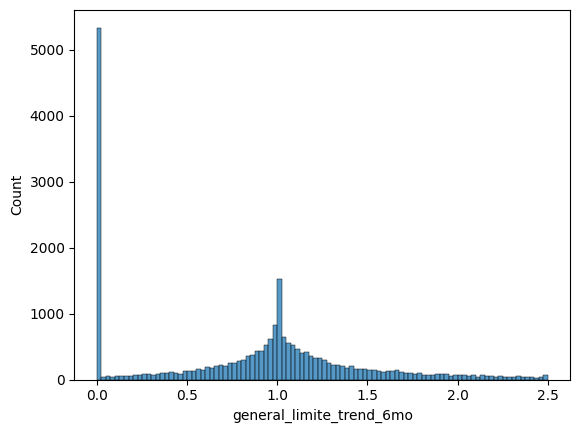

In [63]:
sns.histplot(train[train['general_limite_trend_6mo'] <= 2.5]['general_limite_trend_6mo'], bins=100)
plt.show()
# Similar to a Tweedie distribution

Percentage of values greater than 2.5: 9.81%


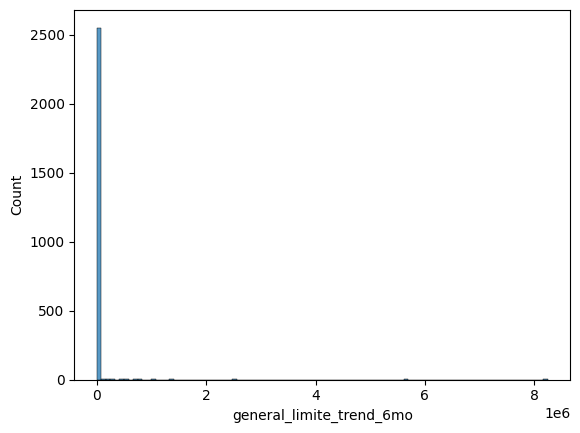

Percentage of values greater than 10: 2.11%


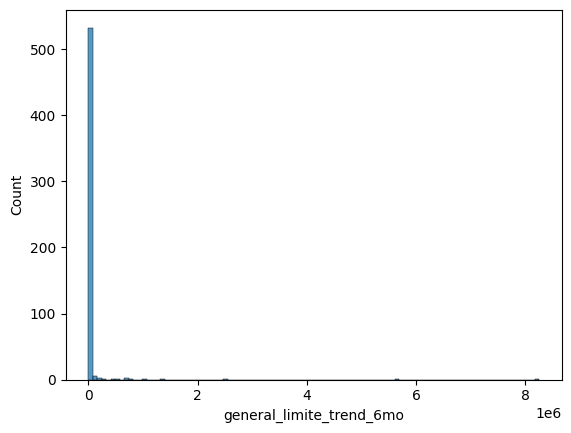

Percentage of values greater than 1000: 0.13%


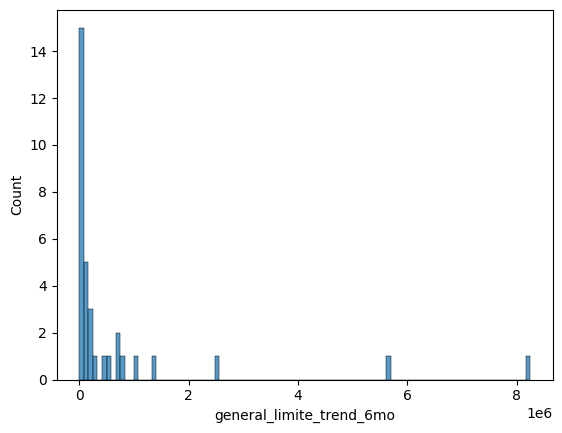

Percentage of values greater than 10000: 0.11%


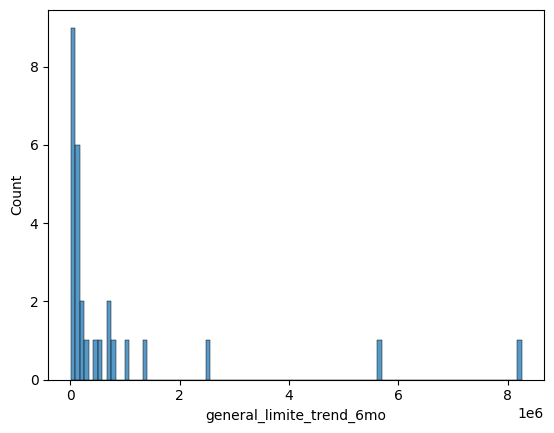

In [64]:
for value in [2.5, 10, 1000, 10000]:
    print(f'Percentage of values greater than {value}: {(train["general_limite_trend_6mo"] > value).value_counts(1)[True]:.2%}')
    sns.histplot(train[train['general_limite_trend_6mo'] > value]['general_limite_trend_6mo'], bins=100)
    plt.show()

Percentage of values greater than 2.5: 9.81%


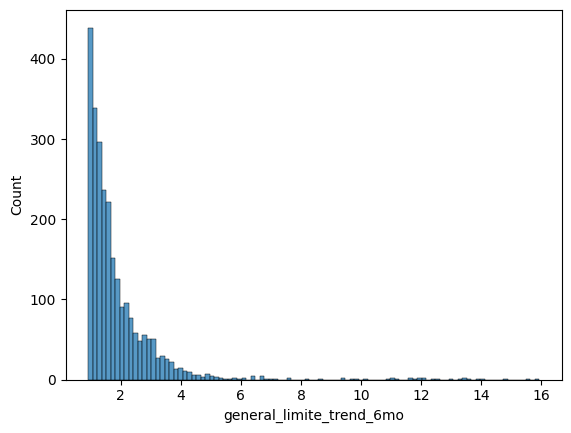

Percentage of values greater than 10: 2.11%


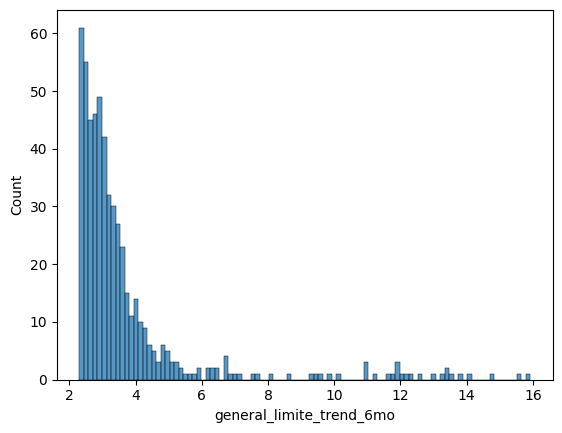

Percentage of values greater than 1000: 0.13%


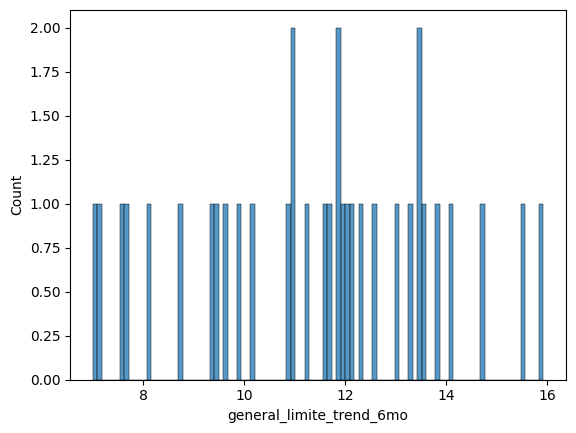

Percentage of values greater than 10000: 0.11%


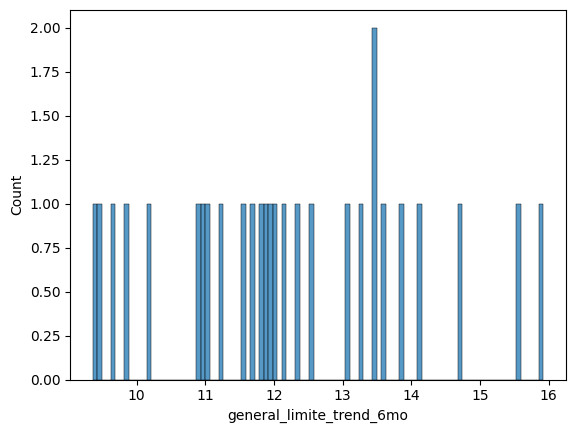

In [65]:
for value in [2.5, 10, 1000, 10000]:
    print(f'Percentage of values greater than {value}: {(train["general_limite_trend_6mo"] > value).value_counts(1)[True]:.2%}')
    sns.histplot(np.log(train[train['general_limite_trend_6mo'] > value]['general_limite_trend_6mo']), bins=100, label=f'log({value})')
    plt.show()

In [66]:
# A capper to this feature may be useful, as the right tail contains a few cases with high feature values.
# The log transformation may also be useful, as it may help to reduce the right skewness of the feature.

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


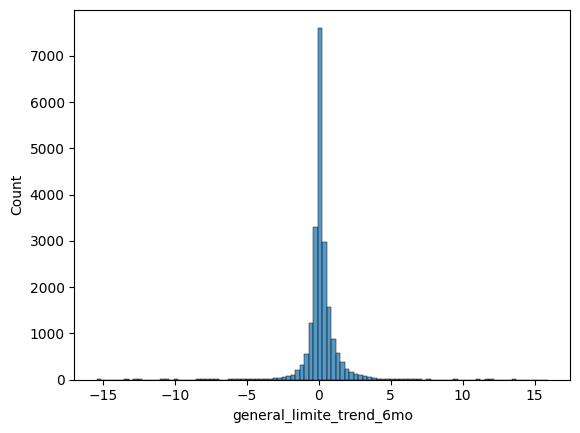

In [67]:
sns.histplot(np.log(train['general_limite_trend_6mo']), bins=100, label=f'log({value})')
plt.show()

#### v254r_cnt_board_memebers

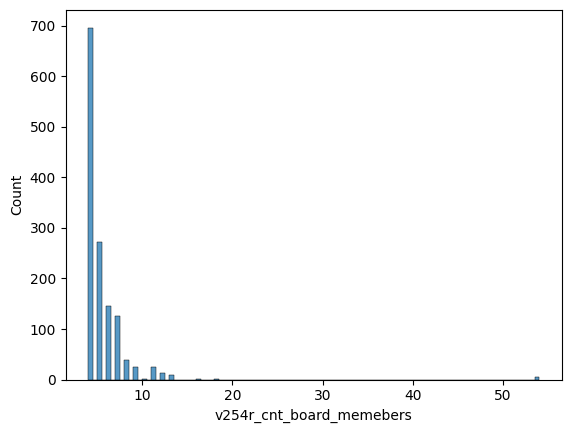

In [68]:
sns.histplot(train[train['v254r_cnt_board_memebers'] > 3]['v254r_cnt_board_memebers'], bins=100)
plt.show()

In [69]:
train['v254r_cnt_board_memebers'].value_counts(1)

v254r_cnt_board_memebers
1     0.506565
2     0.367280
3     0.074204
4     0.026567
5     0.010421
6     0.005573
7     0.004771
8     0.001489
11    0.000916
9     0.000916
12    0.000496
13    0.000382
54    0.000191
18    0.000076
10    0.000076
16    0.000076
Name: proportion, dtype: float64

In [70]:
# general_limite_trend_6mo
# is_not_able_to_calc_interest

features_to_keep


['general_vencido_sum',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'general_limite_trend_6mo',
 'general_vencido_sum_sum_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'v204r_is_popular_domain',
 'general_vencido_max_prev_6mo',
 'days_since_oldest_board_member',
 'years_since_first_relationship',
 'general_lost_pct_risco',
 'v254r_cnt_board_memebers',
 'general_limite_de_cred_sum',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'risco_total',
 'general_lost_sum',
 'general_limite_de_cred_sum_pct_risco',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_lost_pct_cart_cred',
 'general_limite_de_cred_360m_sum',
 'general_vencido_pct_risco_max_prev_6mo',
 'cnt_declined_reasons',
 'general_a_vencer_pct_risco']

In [71]:
train[keys + ['general_limite_trend_6mo']].head(50).sort_values(['fake_cnpj', 'date_reference'])

,fake_cnpj,date_reference,general_limite_trend_6mo
2,76,2021-03-01,1.000000
0,76,2021-04-01,0.994837
1,76,2021-05-01,0.980906
3,254,2020-10-01,0.750458
5,254,2020-11-01,0.721039
4,254,2020-12-01,0.701373
7,299,2020-09-01,1.803249
8,299,2020-10-01,1.662086
6,299,2020-11-01,1.645552
15,508,2020-09-01,0.444890


In [72]:
train['is_not_able_to_calc_interest'].value_counts()

is_not_able_to_calc_interest
1     8959
0     7897
2     5230
3     2531
4     1008
5      375
6      143
7       34
8       14
9        6
10       1
Name: count, dtype: int64

# Wrap up the EDA and list features to keep, transform and build

In [73]:
sorted(features_to_keep)

['chk_esp_cred_rot_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'cnt_declined_reasons',
 'days_since_oldest_board_member',
 'general_a_vencer_pct_risco',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'general_limite_de_cred_360m_sum',
 'general_limite_de_cred_sum',
 'general_limite_de_cred_sum_pct_risco',
 'general_limite_trend_6mo',
 'general_lost_pct_cart_cred',
 'general_lost_pct_risco',
 'general_lost_sum',
 'general_vencido_max_prev_6mo',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_vencido_pct_risco_max_prev_6mo',
 'general_vencido_sum',
 'general_vencido_sum_sum_pct_risco',
 'risco_total',
 'v204r_is_popular_domain',
 'v254r_cnt_board_memebers',
 'years_since_first_relationship']

In [74]:
manually_removed_features = ['general_limite_de_cred_360m_sum']

In [75]:
def create__general_lost_sum__over__general_limite_de_cred_sum(df: pd.DataFrame) -> pd.DataFrame:
    df['general_lost_sum__over__general_limite_de_cred_sum'] = df['general_lost_sum'] / df['general_limite_de_cred_sum']
    return df

def create__general_vencido_sum__over__general_limite_de_cred_sum(df: pd.DataFrame) -> pd.DataFrame:
    df['general_vencido_sum__over__general_limite_de_cred_sum'] = df['general_vencido_sum'] / df['general_limite_de_cred_sum']
    return df

features_to_remove_after_new_features_are_added = ['general_lost_sum', 'general_limite_de_cred_sum', 'general_vencido_sum']

In [76]:
final_features = set(features_to_keep) - set(manually_removed_features) - set(features_to_remove_after_new_features_are_added)
final_features

{'chk_esp_cred_rot_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'cnt_declined_reasons',
 'days_since_oldest_board_member',
 'general_a_vencer_pct_risco',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'general_limite_de_cred_sum_pct_risco',
 'general_limite_trend_6mo',
 'general_lost_pct_cart_cred',
 'general_lost_pct_risco',
 'general_vencido_max_prev_6mo',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_vencido_pct_risco_max_prev_6mo',
 'general_vencido_sum_sum_pct_risco',
 'risco_total',
 'v204r_is_popular_domain',
 'v254r_cnt_board_memebers',
 'years_since_first_relationship'}